# Player Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Load and preprocess data
df = pd.read_csv("Player_stats.csv")

df.head()

,Season,Index,Rank,Player_Name,Nationality,Position,Team,Player_Age,Year_Born,Matches_Played,...,Assists.1,Goals_Assists.1,Goals_No_Penalty.1,G+A-PK,Expected_Goals.1,Expected_Assists.1,xG+xAG,Non_Penalty_Expected_Goals.1,Non_Penalty_Expected_Goals_Assists.1,Match_Instances
0,2020-2021,0,1,Sabit Abdulai,gh GHA,MF,Getafe,21.0,1999.0,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
1,2020-2021,1,2,Marcos Acuña,ar ARG,DF,Sevilla,28.0,1991.0,30,...,0.08,0.12,0.04,0.12,0.04,0.10,0.14,0.04,0.14,Matches
2,2020-2021,2,3,Bobby Adekanye,nl NED,"FW,MF",Cádiz,21.0,1999.0,3,...,0.00,0.00,0.00,0.00,0.85,0.00,0.85,0.85,0.85,Matches
3,2020-2021,3,4,Martin Agirregabiria,es ESP,"DF,MF",Alavés,24.0,1996.0,26,...,0.06,0.06,0.00,0.06,0.01,0.04,0.05,0.01,0.05,Matches
4,2020-2021,4,5,Joseph Aidoo,gh GHA,DF,Celta Vigo,24.0,1995.0,25,...,0.00,0.00,0.00,0.00,0.06,0.02,0.08,0.06,0.08,Matches


In [ ]:
df = df.drop(['Rank'], axis=1)
df.head()

,Season,Index,Player_Name,Nationality,Position,Team,Player_Age,Year_Born,Matches_Played,Starts,...,Assists_2,Goals_Assists_3,Goals_No_Penalty_4,G+A-PK,Expected_Goals_5,Expected_Assists_6,xG+xAG,Non_Penalty_Expected_Goals_7,Non_Penalty_Expected_Goals_Assists_8,Match_Instances
0,2020-2021,0,Sabit Abdulai,gh GHA,MF,Getafe,21.0,1999.0,3,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
1,2020-2021,1,Marcos Acuña,ar ARG,DF,Sevilla,28.0,1991.0,30,26,...,0.08,0.12,0.04,0.12,0.04,0.10,0.14,0.04,0.14,Matches
2,2020-2021,2,Bobby Adekanye,nl NED,"FW,MF",Cádiz,21.0,1999.0,3,0,...,0.00,0.00,0.00,0.00,0.85,0.00,0.85,0.85,0.85,Matches
3,2020-2021,3,Martin Agirregabiria,es ESP,"DF,MF",Alavés,24.0,1996.0,26,16,...,0.06,0.06,0.00,0.06,0.01,0.04,0.05,0.01,0.05,Matches
4,2020-2021,4,Joseph Aidoo,gh GHA,DF,Celta Vigo,24.0,1995.0,25,14,...,0.00,0.00,0.00,0.00,0.06,0.02,0.08,0.06,0.08,Matches


In [ ]:
print(df.columns.to_list())

['Season', 'Index', 'Player_Name', 'Nationality', 'Position', 'Team', 'Player_Age', 'Year_Born', 'Matches_Played', 'Starts', 'Minutes_Played', 'Matches_90s', 'Goals', 'Assists', 'Goals_Assists', 'Goals_No_Penalty', 'Penalties_Scored', 'Penalties_Attempted', 'Yellow_Cards', 'Red_Cards', 'Expected_Goals', 'Non_Penalty_Expected_Goals', 'Expected_Assists', 'Non_Penalty_Expected_Goals_Assists', 'Progressive_Carries', 'Progressive_Passes', 'Progressive_Passes_Received', 'Goals_1', 'Assists_2', 'Goals_Assists_3', 'Goals_No_Penalty_4', 'G+A-PK', 'Expected_Goals_5', 'Expected_Assists_6', 'xG+xAG', 'Non_Penalty_Expected_Goals_7', 'Non_Penalty_Expected_Goals_Assists_8', 'Match_Instances']


In [2]:
# Step 1: Select Features and Target
target = 'Goals'
features = ['Position', 'Player_Age', 'Minutes_Played', 'Matches_Played',
            'Progressive_Carries', 'Progressive_Passes', 'Expected_Goals',
            'Non_Penalty_Expected_Goals', 'Assists', 'Goals_No_Penalty', 'Penalties_Scored']


In [3]:
# Drop rows with NaN
df = df.dropna(subset=features + [target])

In [4]:
# Ensure target column exists in the dataset
if target not in df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataset.")

In [5]:
# Step 2: Handle Categorical and Numerical Data
categorical_features = ['Position']
numerical_features = [col for col in features if col not in categorical_features]

In [6]:
# Preprocessing pipelines for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [7]:
# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [8]:
# Step 3: Train-Test Split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Step 4: Define Models
models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', RandomForestRegressor(n_estimators=100, random_state=42))])
}


In [10]:
# Step 5: Train and Evaluate Models
for name, pipeline in models.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} - MSE: {mse:.2f}, R2 Score: {r2:.2f}")


Training Linear Regression...
Linear Regression - MSE: 0.00, R2 Score: 1.00
Training Random Forest...
Random Forest - MSE: 0.15, R2 Score: 0.98


In [11]:
# Optional: Feature Importance for Random Forest
rf_model = models["Random Forest"].named_steps['model']
if hasattr(rf_model, 'feature_importances_'):
    feature_importance = rf_model.feature_importances_
    feature_names = numerical_features + list(
        models["Random Forest"].named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    print(importance_df.sort_values(by='Importance', ascending=False))

                       Feature    Importance
8             Goals_No_Penalty  9.177046e-01
5               Expected_Goals  4.527412e-02
9             Penalties_Scored  2.829540e-02
6   Non_Penalty_Expected_Goals  1.733770e-03
1               Minutes_Played  1.547275e-03
7                      Assists  1.333937e-03
0                   Player_Age  9.984418e-04
3          Progressive_Carries  9.815550e-04
4           Progressive_Passes  8.324540e-04
2               Matches_Played  8.284939e-04
15              Position_FW,MF  1.843922e-04
13                 Position_FW  1.806868e-04
17                 Position_MF  7.985005e-05
19              Position_MF,FW  2.457703e-05
12              Position_DF,MF  4.873085e-07
14              Position_FW,DF  0.000000e+00
16                 Position_GK  0.000000e+00
11              Position_DF,FW  0.000000e+00
18              Position_MF,DF  0.000000e+00
10                 Position_DF  0.000000e+00


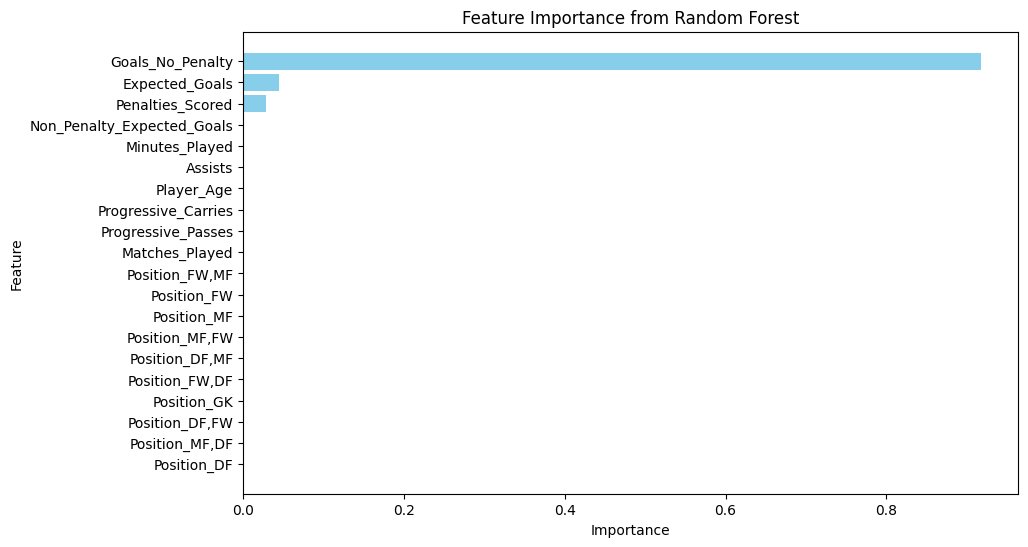

In [12]:
import matplotlib.pyplot as plt

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()


In [13]:
# Select relevant features
features = [
    'Matches_Played', 'Minutes_Played', 'Goals_Assists',
    'Expected_Goals', 'Non_Penalty_Expected_Goals', 'Progressive_Carries',
    'Progressive_Passes', 'Player_Age', 'Assists'
]
target = 'Goals'

X = df[features]
y = df[target]


In [14]:
X.fillna(0, inplace=True)


<ipython-input-14-67b4599ed24c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 0.27522619542619536
R² Score: 0.9714575243103586


In [17]:
def predict_goals(player_name, df, model):
    """
    Predict the number of goals for a specific player.
    Args:
        player_name (str): The name of the player.
        df (pd.DataFrame): The dataset containing player data.
        model (sklearn model): The trained model.

    Returns:
        str: Prediction results.
    """
    player_data = df[df['Player_Name'] == player_name]

    if player_data.empty:
        return f"Player {player_name} not found in the dataset."

    # Extract relevant features
    features = [
        'Matches_Played', 'Minutes_Played', 'Goals_Assists',
        'Expected_Goals', 'Non_Penalty_Expected_Goals', 'Progressive_Carries',
        'Progressive_Passes', 'Player_Age', 'Assists'
    ]
    player_features = player_data[features].fillna(0)

    # Predict
    predicted_goals = model.predict(player_features)

    return f"Predicted Goals for {player_name} in the coming season: {predicted_goals[0]:.2f}"


In [18]:
player_name = "Robert Lewandowski"  # Replace with a player name in your dataset
result = predict_goals(player_name, df, model)
print(result)


Predicted Goals for Robert Lewandowski in the coming season: 23.15


<ipython-input-19-e2e076f53db3>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


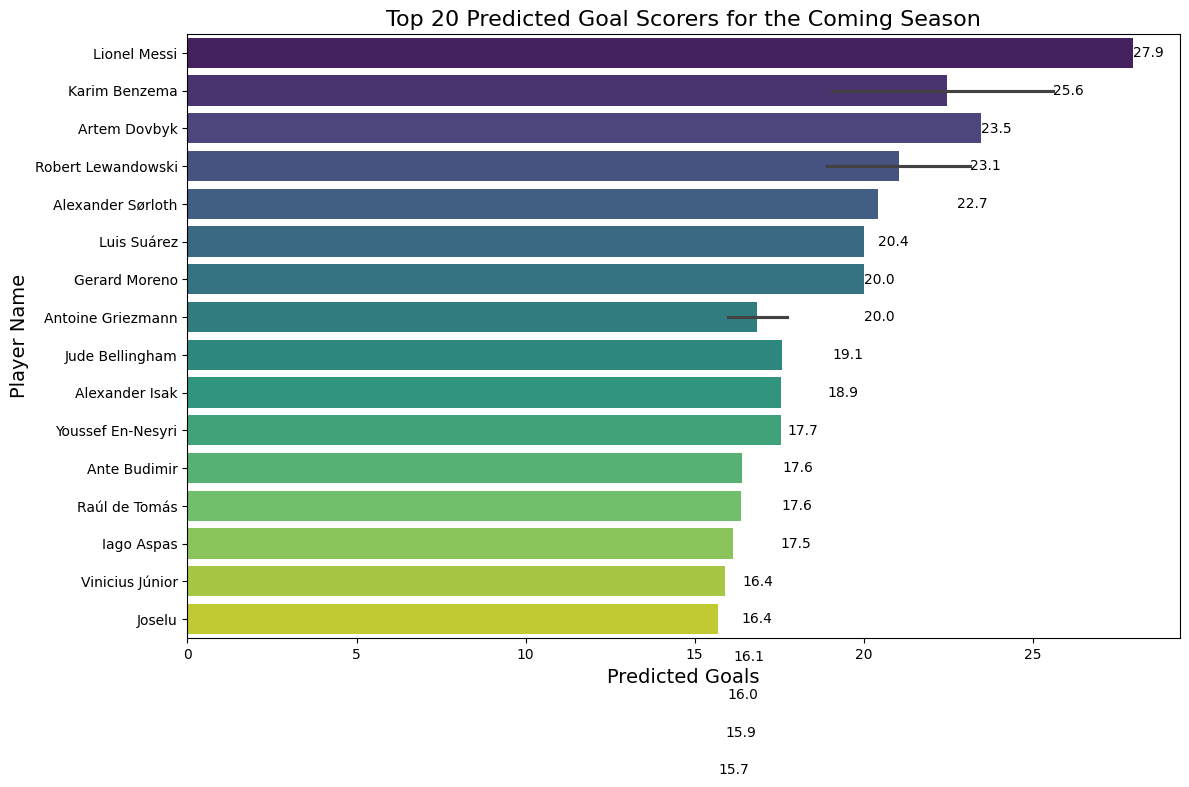

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_top_goal_scorers(df, model):
    """
    Plot the top 20 predicted goal scorers for the coming season.
    Args:
        df (pd.DataFrame): Dataset containing player data.
        model (sklearn model): Trained model.

    Returns:
        None: Displays the bar chart.
    """
    # Extract relevant features
    features = [
        'Matches_Played', 'Minutes_Played', 'Goals_Assists',
        'Expected_Goals', 'Non_Penalty_Expected_Goals', 'Progressive_Carries',
        'Progressive_Passes', 'Player_Age', 'Assists'
    ]

    # Ensure no missing values
    player_features = df[features].fillna(0)

    # Predict goals for all players
    df['Predicted_Goals'] = model.predict(player_features)

    # Get the top 20 players
    top_scorers = df[['Player_Name', 'Team', 'Predicted_Goals']].sort_values(
        by='Predicted_Goals', ascending=False
    ).head(20)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=top_scorers,
        x='Predicted_Goals',
        y='Player_Name',
        palette='viridis'
    )
    plt.title('Top 20 Predicted Goal Scorers for the Coming Season', fontsize=16)
    plt.xlabel('Predicted Goals', fontsize=14)
    plt.ylabel('Player Name', fontsize=14)
    # Add value labels on each bar
    for index, value in enumerate(top_scorers['Predicted_Goals']):
      plt.text(value, index, f'{value:.1f}', va='center')

    plt.gca()  # Invert y-axis to have the top scorer at the top
    plt.tight_layout()
    plt.show()

# Example Usage
plot_top_goal_scorers(df, model)


Predicting assists


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Function to train the model and predict assists
def train_and_predict_assists(df):
    """
    Train a regression model to predict assists and return predictions.
    Args:
        df (pd.DataFrame): Dataset containing player data.

    Returns:
        model: Trained model for assists prediction.
        df (pd.DataFrame): Dataset with predicted assists column added.
    """
    # Define features and target
    features = [
        'Matches_Played', 'Minutes_Played', 'Progressive_Passes',
        'Progressive_Carries', 'Expected_Assists',
        'Non_Penalty_Expected_Goals_Assists', 'Player_Age',
        'Goals_Assists', 'Assists_2'
    ]
    target = 'Assists'

    # Drop missing values
    df = df.dropna(subset=[target] + features)

    # Features and target
    X = df[features]
    y = df[target]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Evaluate Model
    y_pred = model.predict(X_test)
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

    # Predict assists for all players
    df['Predicted_Assists'] = model.predict(df[features])

    return model, df

In [22]:
# Function to plot top 20 assist leaders
def plot_top_assist_scorers(df):
    """
    Plot the top 20 predicted assist leaders for the coming season.
    Args:
        df (pd.DataFrame): Dataset containing player data.

    Returns:
        None: Displays the bar chart.
    """
    # Get the top 20 players by predicted assists
    top_assist_leaders = df[['Player_Name', 'Team', 'Predicted_Assists']].sort_values(
        by='Predicted_Assists', ascending=False
    ).head(20)

    # Plot
    plt.figure(figsize=(12, 8))
    sns.barplot(
        data=top_assist_leaders,
        x='Predicted_Assists',
        y='Player_Name',
        palette='coolwarm'
    )
    plt.title('Top 20 Predicted Assist Leaders for the Coming Season', fontsize=16)
    plt.xlabel('Predicted Assists', fontsize=14)
    plt.ylabel('Player Name', fontsize=14)
    # Add value labels on each bar
    for index, value in enumerate(top_assist_leaders['Predicted_Assists']):
      plt.text(value, index, f'{value:.1f}', va='center')
    plt.gca()
    plt.tight_layout()
    plt.show()

In [23]:
# Example usage
model, df = train_and_predict_assists(df)  # Train the model and add predictions
plot_top_assist_scorers(df)  # Visualize top 20 assist leaders

KeyError: ['Assists_2']

In [ ]:
def predict_assists(player_name, df, model):
    """
    Predict assists for a specific player using the trained model.
    Args:
        player_name (str): The name of the player to predict assists for.
        df (pd.DataFrame): Dataset containing player data.
        model: Trained model for assists prediction.

    Returns:
        str: Prediction result for the specified player.
    """
    # Check if the player exists in the dataset
    player_data = df[df['Player_Name'] == player_name]
    if player_data.empty:
        return f"Player {player_name} not found in the dataset."

    # Features used for prediction
    features = [
        'Matches_Played', 'Minutes_Played', 'Progressive_Passes',
        'Progressive_Carries', 'Expected_Assists',
        'Non_Penalty_Expected_Goals_Assists', 'Player_Age',
        'Goals_Assists', 'Assists_2'
    ]

    # Ensure the player has no missing values in the features
    player_data = player_data.dropna(subset=features)
    if player_data.empty:
        return f"Insufficient data for player {player_name}."

    # Make prediction
    player_features = player_data[features]
    predicted_assists = model.predict(player_features)[0]  # Predict and get the first result

    return f"Predicted assists for {player_name} in the coming season: {predicted_assists:.2f}"




In [ ]:
# Example usage
player_name = "Lionel Messi"  # Replace with a player name in your dataset
result = predict_assists(player_name, df, model)
print(result)

# Team Dataset

In [24]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = 'cleaned_dataset_no_index.csv'  # Update with your dataset file path
data = pd.read_csv(file_path)

# Select relevant columns for recommendation
columns_to_use = [
    'Player', 'Team', 'Goals (Gls)', 'Assists (Ast)',
    'Progressive Carries (PrgC)', 'Progressive Passes (PrgP)', 'Minutes Played (Min)'
]

# Check if required columns exist
if all(col in data.columns for col in columns_to_use):
    # Filter dataset with relevant columns
    relevant_data = data[columns_to_use].dropna()

    # Create a performance score based on goals, assists, and other metrics
    relevant_data['Performance_Score'] = (
        relevant_data['Goals (Gls)'] * 3 +
        relevant_data['Assists (Ast)'] * 2 +
        relevant_data['Progressive Carries (PrgC)'] * 0.5 +
        relevant_data['Progressive Passes (PrgP)'] * 0.5
    )

    # Create a pivot table: Teams as rows, Players as columns, and scores as values
    pivot_table = relevant_data.pivot_table(
        index='Team', columns='Player', values='Performance_Score', fill_value=0
    )

    # Compute cosine similarity between teams
    team_similarity = cosine_similarity(pivot_table)
    team_similarity_df = pd.DataFrame(team_similarity, index=pivot_table.index, columns=pivot_table.index)

    # Function to recommend players for all teams
    def recommend_for_all_teams(num_recommendations=5):
        """
        Recommends players for all teams based on similarity.
        Args:
            num_recommendations (int): Number of recommendations per team.
        Returns:
            dict: Recommendations for each team.
        """
        all_teams = pivot_table.index
        recommendations = {}

        for team in all_teams:
            team_players = pivot_table.loc[team][pivot_table.loc[team] > 0].index
            team_recommendations = {}

            similar_teams = team_similarity_df[team].sort_values(ascending=False).index[1:]

            for similar_team in similar_teams:
                similar_team_players = pivot_table.loc[similar_team][pivot_table.loc[similar_team] > 0].index

                for player in similar_team_players:
                    if player not in team_players:
                        team_recommendations[player] = pivot_table.loc[similar_team, player]

            # Sort recommendations by score and take the top N
            sorted_recommendations = sorted(team_recommendations.items(), key=lambda x: x[1], reverse=True)
            recommendations[team] = sorted_recommendations[:num_recommendations]

        return recommendations

    # Get recommendations for every team
    all_team_recommendations = recommend_for_all_teams()

    # Format and display recommendations
    for team, recs in all_team_recommendations.items():
        print(f"\nTop recommendations for {team}:")
        for player, score in recs:
            print(f"  {player}: Predicted Performance Score {score:.2f}")
else:
    print("Required columns are missing from the dataset.")

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_dataset_no_index.csv'

In [ ]:
# Replot with aesthetic colors
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Collect all recommended players across teams
all_recommended_players = []

for team, recs in all_team_recommendations.items():
    all_recommended_players.extend([player for player, _ in recs])

# Count the frequency of each recommended player
player_recommendation_counts = Counter(all_recommended_players)

# Get the top 10 most recommended players
top_players = player_recommendation_counts.most_common(10)

# Separate names and counts for visualization
players, counts = zip(*top_players)

# Set aesthetic style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Plot the data with aesthetic colors
plt.figure(figsize=(12, 6))
plt.barh(players, counts, color=sns.color_palette("coolwarm", len(players)))
plt.xlabel('Number of Recommendations', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.title('Top 10 Most Recommended Players Across Teams', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aggregate team stats
team_stats = data.groupby('Team').agg({
    'Goals (Gls)': 'sum',
    'Assists (Ast)': 'sum',
    'Yellow Cards (CrdY)': 'sum',
    'Red Cards (CrdR)': 'sum',
    'Expected Goals (xG)': 'sum'
}).reset_index()

# Define target (Top half: 1, Bottom half: 0)
team_stats['Top_Half'] = team_stats['Goals (Gls)'].rank(ascending=False).apply(lambda x: 1 if x <= len(team_stats) / 2 else 0)

# Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
X = team_stats[features]
y = team_stats['Top_Half']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Define the target as league position (e.g., 1st, 2nd, ...)
team_stats['League_Position'] = team_stats['Goals (Gls)'].rank(ascending=False).astype(int)

# Step 2: Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
target = 'League_Position'

X = team_stats[features]
y = team_stats[target]

# Encode the league position for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Get unique classes in the test set
unique_classes_in_test = np.unique(y_test)

# Generate a classification report with the correct labels
print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=unique_classes_in_test,
    target_names=list(map(str, label_encoder.inverse_transform(unique_classes_in_test)))
))

# Function to predict specific position for a team
def predict_team_position(team_name, model, team_stats, features, label_encoder):
    """
    Predicts the league position of a team using the trained model.

    Args:
        team_name (str): The name of the team to predict.
        model: Trained Random Forest Classifier.
        team_stats (pd.DataFrame): Aggregated team stats dataframe.
        features (list): List of features used in the model.
        label_encoder: LabelEncoder instance used to encode positions.

    Returns:
        str: Prediction result for the specified team.
    """
    # Filter the stats for the specific team
    team_data = team_stats[team_stats['Team'] == team_name]

    if team_data.empty:
        return f"Team '{team_name}' not found in the dataset."

    # Extract feature values
    X_team = team_data[features]

    # Predict using the model
    prediction_encoded = model.predict(X_team)
    prediction_decoded = label_encoder.inverse_transform(prediction_encoded)

    return f"Predicted League Position for {team_name}: {prediction_decoded[0]}"

# Example usage
team_name = "RealMadrid"  # Replace with the team name you want to predict
result = predict_team_position(team_name, model, team_stats, features, label_encoder)
print(result)

Classification Report:
              precision    recall  f1-score   support

          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          17       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1

   micro avg       1.00      0.17      0.29         6
   macro avg       0.17      0.17      0.17         6
weighted avg       0.17      0.17      0.17         6

Predicted League Position for RealMadrid: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Step 1: Define the target as league position (e.g., 1st, 2nd, ...)
team_stats['League_Position'] = team_stats['Goals (Gls)'].rank(ascending=False).astype(int)

# Step 2: Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
target = 'League_Position'

X = team_stats[features]
y = team_stats[target]

# Encode the league position for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict positions for all teams
predicted_positions_encoded = model.predict(X)
predicted_positions = label_encoder.inverse_transform(predicted_positions_encoded)
# Step 6: Add predictions to the dataframe
team_stats['Predicted Position'] = predicted_positions

# Step 7: Sort teams by predicted positions and reassign unique positions
team_stats_sorted = team_stats.sort_values(by='Predicted Position').reset_index(drop=True)
team_stats_sorted['Unique Predicted Position'] = range(1, len(team_stats_sorted) + 1)

# Step 8: Display the top 20 teams
top_20_teams = team_stats_sorted.head(20)
print(top_20_teams[['Team', 'Unique Predicted Position']])


# Optional: Save the table to a CSV file
top_20_teams[['Team', 'Predicted Position']].to_csv('top_20_teams_predictions.csv', index=False)

            Team  Unique Predicted Position
0     RealMadrid                          1
1      Barcelona                          2
2             AM                          3
3     Villarreal                          4
4             RB                          5
5   RealSociadad                          6
6        Almeria                          7
7             CV                          8
8       Valencia                          9
9        Osasuna                         10
10            AC                         11
11        Girona                         12
12       Granada                         13
13        Getafe                         14
14         Cadiz                         15
15            RV                         16
16      Mallorca                         17
17         Elche                         18
18       Levante                         19
19        Alaves                         20


# Top 11 players per season

In [49]:
!pip install tabulate
import pandas as pd
from tabulate import tabulate

# Load the cleaned dataset
final_data_path = "Player_stats.csv"
final_data = pd.read_csv(final_data_path)

# Function to select the best 11 players for a 4-3-3 formation
def create_best_team(data, season):
    # Filter data for the specified season
    season_data = data[data['Season'] == season]

    # Separate players by position
    goalkeepers = season_data[season_data['Position'].str.contains('GK', na=False)]
    defenders = season_data[season_data['Position'].str.contains('DF', na=False)]
    midfielders = season_data[season_data['Position'].str.contains('MF', na=False)]
    forwards = season_data[season_data['Position'].str.contains('FW', na=False)]

    # Sort players by Goals + Assists (or other key metrics)
    goalkeepers = goalkeepers.sort_values(by='Goals_Assists', ascending=False).head(1)
    defenders = defenders.sort_values(by='Goals_Assists', ascending=False).head(4)
    midfielders = midfielders.sort_values(by='Goals_Assists', ascending=False).head(3)
    forwards = forwards.sort_values(by='Goals_Assists', ascending=False).head(3)

    # Combine the best players to form the team
    best_team = pd.concat([goalkeepers, defenders, midfielders, forwards])
    return best_team

# Get the unique seasons
seasons = final_data['Season'].unique()

# Generate the best teams for each season
best_teams = {}
for season in seasons:
    best_teams[season] = create_best_team(final_data, season)

# Print the best teams for each season in a formatted table
for season, team in best_teams.items():
    print(f"\nBest 11 Players for {season} Season:")
    print(tabulate(team, headers='keys', tablefmt='grid'))


Best 11 Players for 2020-2021 Season:
+-----+-----------+---------+--------+-------------------+---------------+------------+-----------------+--------------+-------------+------------------+----------+------------------+---------------+---------+-----------+-----------------+--------------------+--------------------+-----------------------+----------------+-------------+------------------+------------------------------+--------------------+--------------------------------------+-----------------------+----------------------+-------------------------------+-----------+-------------+-------------------+----------------------+----------+--------------------+----------------------+----------+--------------------------------+----------------------------------------+-------------------+
|     | Season    |   Index |   Rank | Player_Name       | Nationality   | Position   | Team            |   Player_Age |   Year_Born |   Matches_Played |   Starts |   Minutes_Played |   Matches_90s |   Goal


Best 11 Players for 2020-2021 Season:
+-----+-------------------+------------+---------+-----------+------------------+-----------------+
|     | Player_Name       | Position   |   Goals |   Assists |   Minutes_Played |   Goals_Assists |
+=====+===================+============+=========+===========+==================+=================+
| 132 | Marko Dmitrović   | GK         |       1 |         0 |             3120 |               1 |
+-----+-------------------+------------+---------+-----------+------------------+-----------------+
|  91 | Yannick Carrasco  | DF,MF      |       6 |        10 |             2179 |              16 |
+-----+-------------------+------------+---------+-----------+------------------+-----------------+
| 173 | Fidel             | MF,DF      |       6 |         3 |             2396 |               9 |
+-----+-------------------+------------+---------+-----------+------------------+-----------------+
|   8 | Jordi Alba        | DF,FW      |       3 |         5 

<ipython-input-52-0e73744a9c48>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


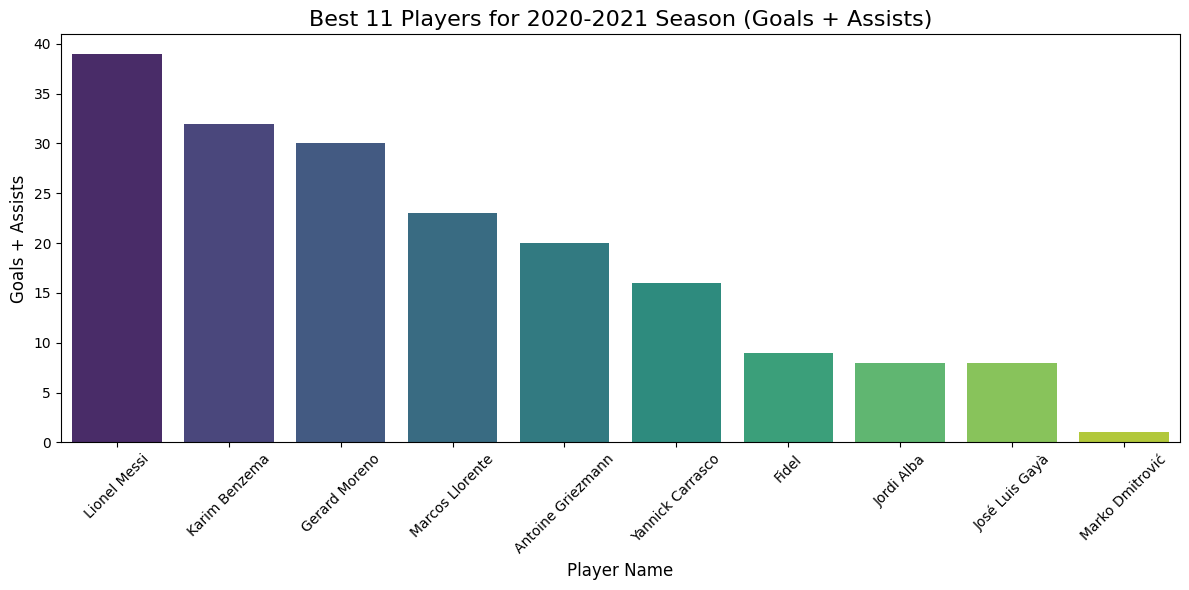


Best 11 Players for 2021-2022 Season:
+------+-------------------+------------+---------+-----------+------------------+-----------------+
|      | Player_Name       | Position   |   Goals |   Assists |   Minutes_Played |   Goals_Assists |
+======+===================+============+=========+===========+==================+=================+
|  655 | Yassine Bounou    | GK         |       0 |         2 |             2790 |               2 |
+------+-------------------+------------+---------+-----------+------------------+-----------------+
|  594 | Jordi Alba        | DF         |       2 |        10 |             2644 |              12 |
+------+-------------------+------------+---------+-----------+------------------+-----------------+
| 1018 | Alfonso Pedraza   | DF         |       4 |         4 |             1701 |               8 |
+------+-------------------+------------+---------+-----------+------------------+-----------------+
|  970 | Álex Moreno       | DF         |       5 | 

<ipython-input-52-0e73744a9c48>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


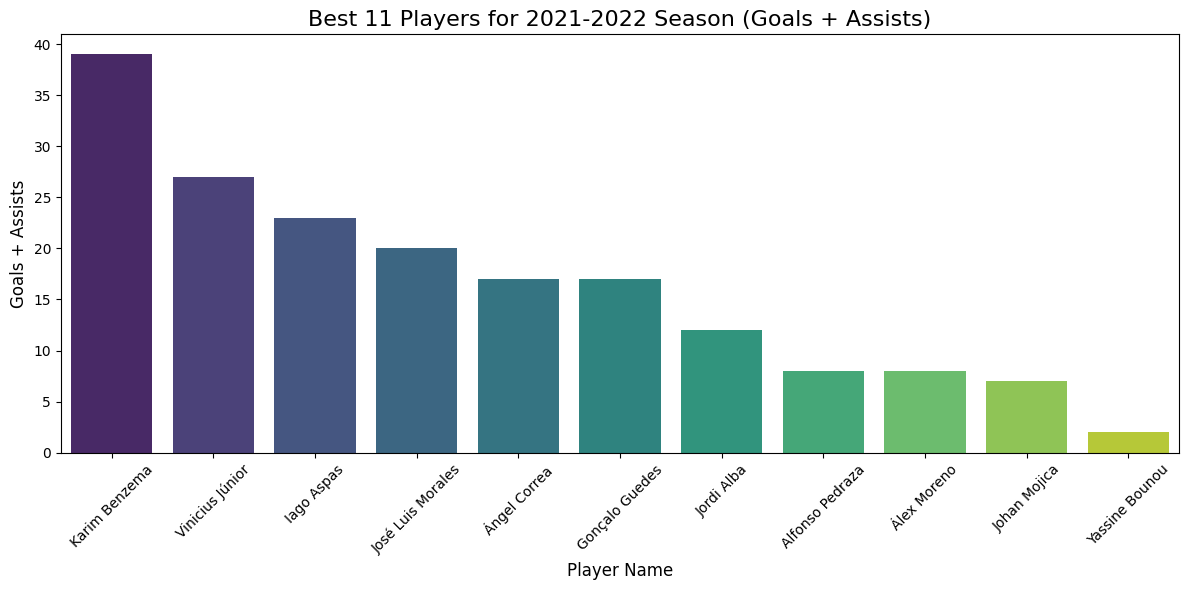


Best 11 Players for 2022-2023 Season:
+------+--------------------+------------+---------+-----------+------------------+-----------------+
|      | Player_Name        | Position   |   Goals |   Assists |   Minutes_Played |   Goals_Assists |
+======+====================+============+=========+===========+==================+=================+
| 1199 | Álvaro Aceves      | GK         |       0 |         0 |               13 |               0 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 1295 | Yannick Carrasco   | DF,MF      |       7 |         3 |             2317 |              10 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 1621 | Brian Oliván       | DF         |       1 |         7 |             2403 |               8 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 1250 | Alejandro Balde    | DF         | 

<ipython-input-52-0e73744a9c48>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


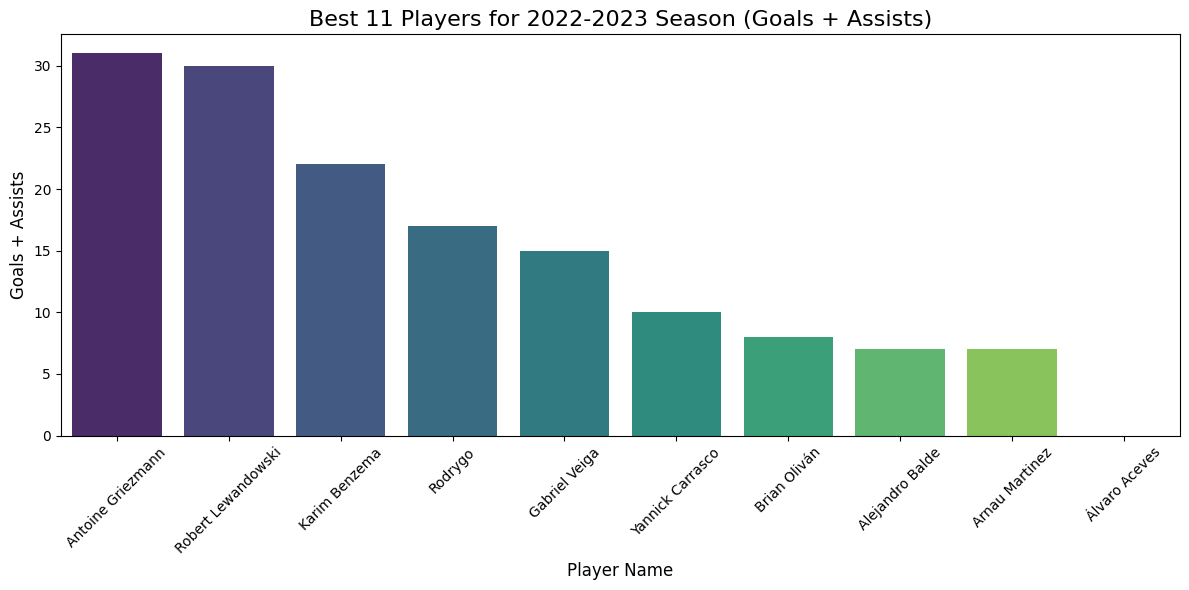


Best 11 Players for 2023-2024 Season:
+------+--------------------+------------+---------+-----------+------------------+-----------------+
|      | Player_Name        | Position   |   Goals |   Assists |   Minutes_Played |   Goals_Assists |
+======+====================+============+=========+===========+==================+=================+
| 1798 | Julen Agirrezabala | GK         |       0 |         0 |              238 |               0 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 2092 | Marcos Llorente    | MF,DF      |       6 |         4 |             2565 |              10 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 1912 | Yan Couto          | DF,FW      |       1 |         8 |             2245 |               9 |
+------+--------------------+------------+---------+-----------+------------------+-----------------+
| 2025 | Miguel Gutiérrez   | DF         | 

<ipython-input-52-0e73744a9c48>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


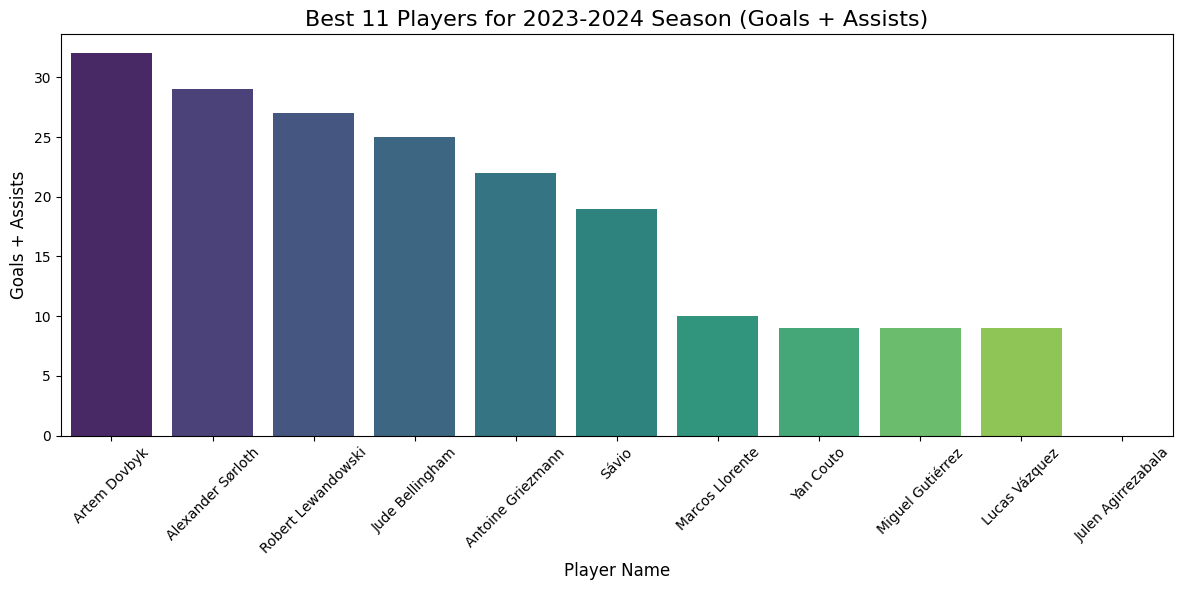

In [52]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
final_data_path = "Player_stats.csv"
final_data = pd.read_csv(final_data_path)

# Fix column names
final_data.rename(columns=lambda x: x.strip(), inplace=True)

# Update important features to match dataset column names
important_features = [
    'Player_Name', 'Position', 'Goals', 'Assists', 'Minutes_Played', 'Goals_Assists'
]

# Function to create the best 11 players
def create_best_team(data, season):
    # Filter data for the specified season
    season_data = data[data['Season'] == season]

    # Separate players by position
    goalkeepers = season_data[season_data['Position'].str.contains('GK', na=False)]
    defenders = season_data[season_data['Position'].str.contains('DF', na=False)]
    midfielders = season_data[season_data['Position'].str.contains('MF', na=False)]
    forwards = season_data[season_data['Position'].str.contains('FW', na=False)]

    # Sort players by Goals + Assists
    goalkeepers = goalkeepers.sort_values(by='Goals_Assists', ascending=False).head(1)
    defenders = defenders.sort_values(by='Goals_Assists', ascending=False).head(4)
    midfielders = midfielders.sort_values(by='Goals_Assists', ascending=False).head(3)
    forwards = forwards.sort_values(by='Goals_Assists', ascending=False).head(3)

    # Combine the best players to form the team
    best_team = pd.concat([goalkeepers, defenders, midfielders, forwards])
    return best_team

# Get the unique seasons
seasons = final_data['Season'].unique()

# Generate the best teams for each season
best_teams = {}
for season in seasons:
    best_teams[season] = create_best_team(final_data, season)

# Visualize the best 11 players for each season
for season, team in best_teams.items():
    print(f"\nBest 11 Players for {season} Season:")
    if team.empty:
        print(f"No data available for {season}.")
        continue

    # Select only important features
    team_features = team[important_features]
    print(tabulate(team_features, headers='keys', tablefmt='grid'))

    # Visualization: Goals + Assists
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=team_features.sort_values(by='Goals_Assists', ascending=False),
        x='Player_Name',
        y='Goals_Assists',
        palette='viridis'
    )
    plt.title(f"Best 11 Players for {season} Season (Goals + Assists)", fontsize=16)
    plt.xlabel("Player Name", fontsize=12)
    plt.ylabel("Goals + Assists", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.savefig(f"best_11_{season}_goals_assists.png")
    plt.show()


Generating lineup for 2020-2021...


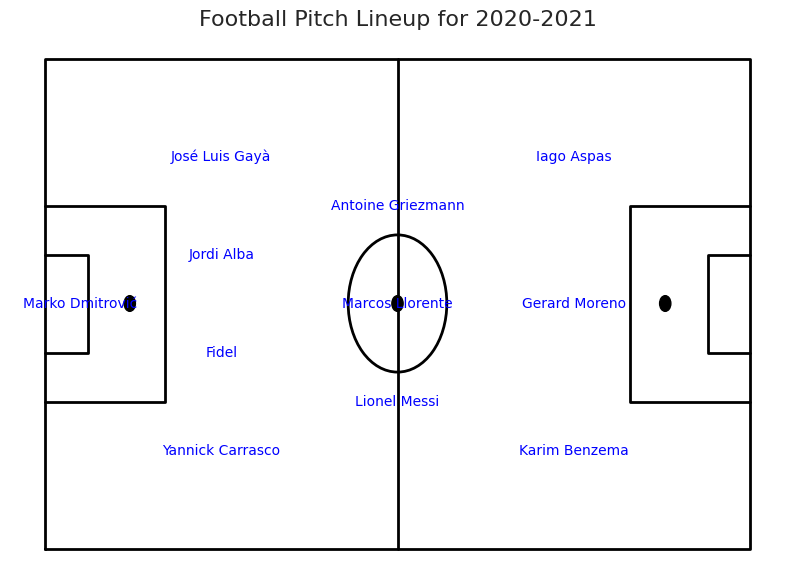

Generating lineup for 2021-2022...


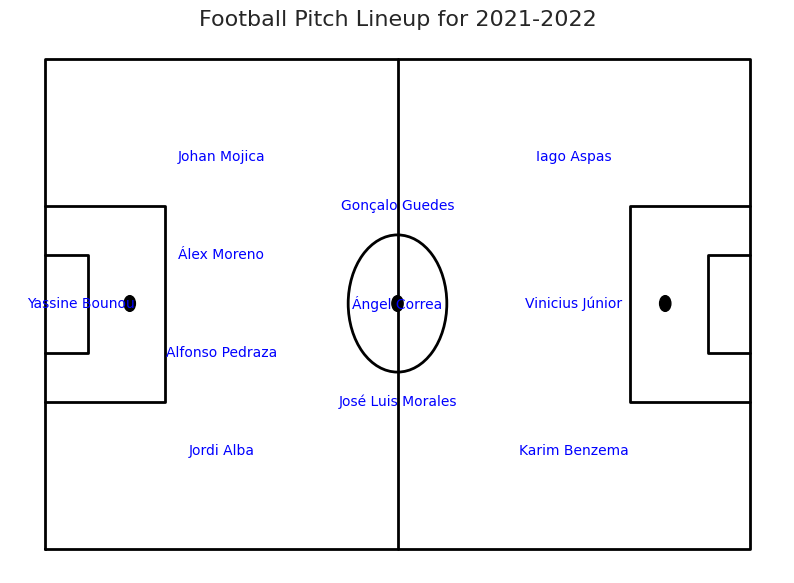

Generating lineup for 2022-2023...


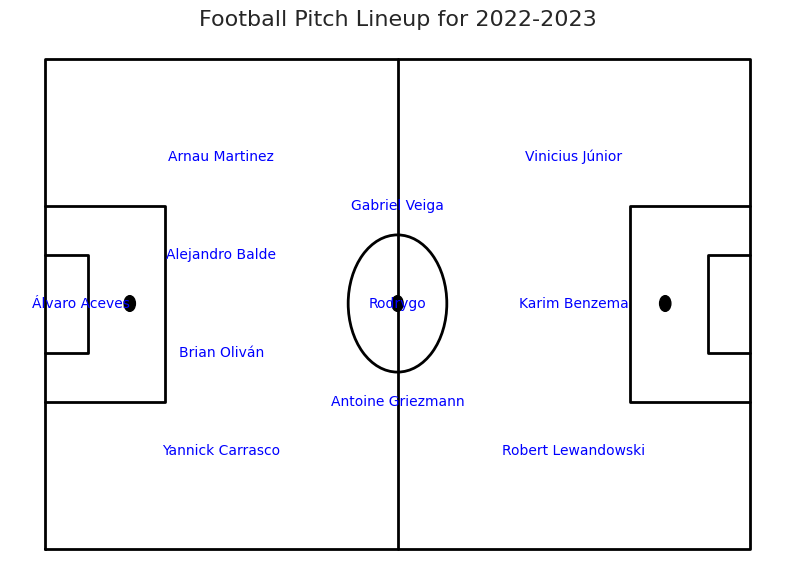

Generating lineup for 2023-2024...


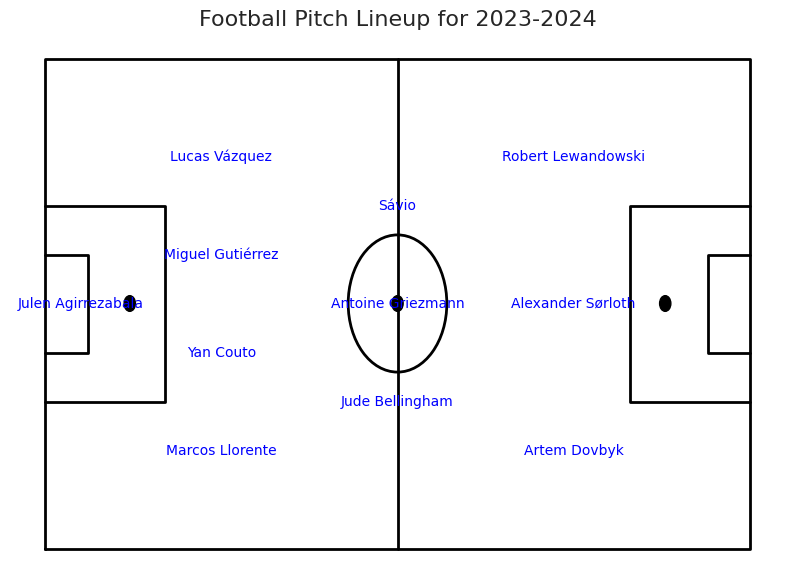

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
final_data_path = "Player_stats.csv"
final_data = pd.read_csv(final_data_path)

# Function to draw the football pitch
def draw_pitch():
    fig, ax = plt.subplots(figsize=(10, 7))
    plt.plot([0, 0, 100, 100, 0], [0, 50, 50, 0, 0], color="black", linewidth=2)
    plt.plot([50, 50], [0, 50], color="black", linewidth=2)
    plt.plot([0, 17, 17, 0], [15, 15, 35, 35], color="black", linewidth=2)
    plt.plot([100, 83, 83, 100], [15, 15, 35, 35], color="black", linewidth=2)
    plt.plot([0, 6, 6, 0], [20, 20, 30, 30], color="black", linewidth=2)
    plt.plot([100, 94, 94, 100], [20, 20, 30, 30], color="black", linewidth=2)
    centreCircle = plt.Circle((50, 25), 7, color="black", fill=False, linewidth=2)
    centreSpot = plt.Circle((50, 25), 0.8, color="black")
    leftPenSpot = plt.Circle((12, 25), 0.8, color="black")
    rightPenSpot = plt.Circle((88, 25), 0.8, color="black")
    ax.add_patch(centreCircle)
    ax.add_patch(centreSpot)
    ax.add_patch(leftPenSpot)
    ax.add_patch(rightPenSpot)
    plt.axis('off')
    return fig, ax

# Function to create a unique lineup for the 4-3-3 formation
def create_unique_lineup(data, season):
    # Filter data for the specified season
    season_data = data[data['Season'] == season].copy()

    # Define the formation with specific positions
    formation = {
        "GK": [(5, 25)],
        "DF": [(25, 10), (25, 20), (25, 30), (25, 40)],
        "MF": [(50, 15), (50, 25), (50, 35)],
        "FW": [(75, 10), (75, 25), (75, 40)],
    }

    lineup = {}
    used_players = set()  # Track used players to avoid duplicates

    # Assign players for each position group
    for pos, coords in formation.items():
        position_players = season_data[season_data['Position'].str.contains(pos, na=False)]
        position_players = position_players[~position_players['Player_Name'].isin(used_players)]
        position_players = position_players.sort_values(by='Goals_Assists', ascending=False).head(len(coords))

        # Assign players and mark them as used
        for (x, y), (_, player) in zip(coords, position_players.iterrows()):
            lineup[(x, y)] = player['Player_Name']
            used_players.add(player['Player_Name'])

    return lineup

# Function to plot the lineup on the pitch
def plot_lineup(lineup, season):
    fig, ax = draw_pitch()
    for (x, y), player_name in lineup.items():
        ax.text(x, y, player_name, ha="center", va="center", fontsize=10, color="blue")
    plt.title(f"Football Pitch Lineup for {season}", fontsize=16)
    plt.show()

# Loop through all seasons and plot the lineup
seasons = final_data['Season'].unique()
for season in seasons:
    print(f"Generating lineup for {season}...")
    lineup = create_unique_lineup(final_data, season)
    plot_lineup(lineup, season)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Load the dataset
file_path = "Player_stats.csv"
data = pd.read_csv(file_path)

# Feature selection
features = [
    'Player_Age', 'Minutes_Played', 'Matches_Played', 'Expected_Goals',
    'Expected_Assists', 'Progressive_Carries', 'Progressive_Passes',
    'Progressive_Passes_Received'
]
target = 'Goals'  # Target variable

# Drop rows with missing values in selected columns
data = data.dropna(subset=features + [target])

# Split the dataset into features (X) and target (y)
X = data[features]
y = data[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Train and evaluate each model
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate the MSE
    mse = mean_squared_error(y_test, y_pred)
    results.append((model_name, mse))

# Display the results
results_df = pd.DataFrame(results, columns=["Model", "Mean Squared Error"]).sort_values(by="Mean Squared Error")

print("Model Comparison:")
print(results_df)

Model Comparison:
                         Model  Mean Squared Error
0            Linear Regression            1.007627
2  Gradient Boosting Regressor            1.113650
1      Random Forest Regressor            1.422142
3      Decision Tree Regressor            2.742204
4     Support Vector Regressor            7.099867


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
file_path = "Player_stats.csv"
data = pd.read_csv(file_path)

# Define features and target
features = [
    'Player_Age', 'Minutes_Played', 'Matches_Played', 'Expected_Goals',
    'Expected_Assists', 'Progressive_Carries', 'Progressive_Passes',
    'Progressive_Passes_Received'
]
target = 'Goals'

# Drop rows with missing values in selected columns
data = data.dropna(subset=features + [target])

# Train-test split for initial model training
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with feature scaling and Ridge Regression
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])

# Train the model on all historical data
model_pipeline.fit(X_train, y_train)

# Function to predict performance for a player using all seasons data
def predict_using_all_seasons(player_name, data, model, features, target):
    # Filter data for the specific player
    player_data = data[data['Player_Name'] == player_name]

    if player_data.empty:
        return f"Player '{player_name}' not found in the dataset."

    # Prepare the aggregated data for prediction
    # Calculate averages for numerical features
    player_avg_features = player_data[features].mean().to_frame().T

    # Predict for the upcoming season
    predicted_goals = model.predict(player_avg_features)

    # Get actual historical goals for reference
    historical_goals = player_data[target].sum()

    return {
        "Player Name": player_name,
        "Predicted Goals for Next Season": predicted_goals[0],
        "Historical Total Goals": historical_goals,
        "Seasons Analyzed": player_data['Season'].unique().tolist()
    }

# Example: Predict performance for Lionel Messi
player_name = "Robert Lewandowski"
player_prediction = predict_using_all_seasons(player_name, data, model_pipeline, features, target)

# Display the prediction result
print(player_prediction)

{'Player Name': 'Robert Lewandowski', 'Predicted Goals for Next Season': 21.871909573057607, 'Historical Total Goals': 42, 'Seasons Analyzed': ['2022-2023', '2023-2024']}


<ipython-input-135-4c2cf1cfd506>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


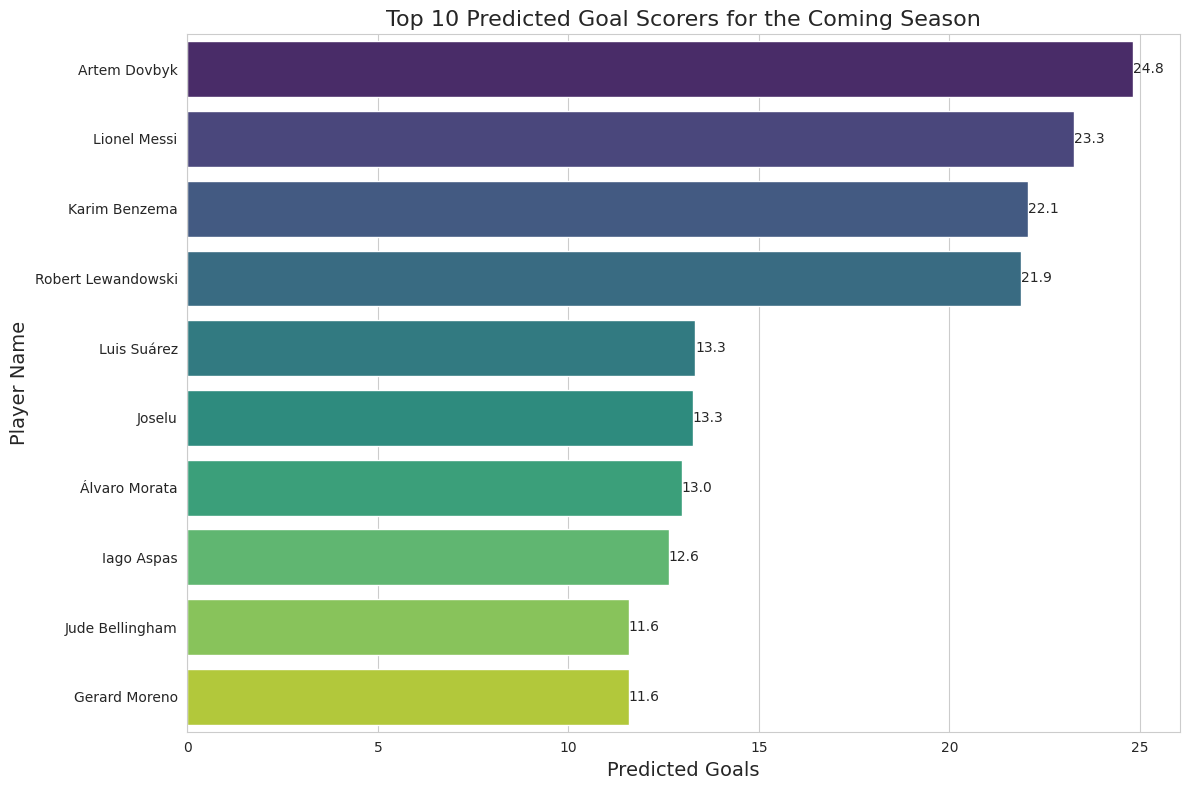

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define a function to predict and collect goal predictions for all players
def predict_goals_for_all_players(data, model, features, target, top_n=10):
    predictions = []
    for player_name in data['Player_Name'].unique():
        prediction = predict_using_all_seasons(player_name, data, model, features, target)
        if isinstance(prediction, dict):  # Ensure the prediction is valid
            predictions.append({
                'Player Name': prediction['Player Name'],
                'Predicted Goals': prediction['Predicted Goals for Next Season']
            })
    # Convert to DataFrame
    predictions_df = pd.DataFrame(predictions)
    # Sort by predicted goals and return top N players
    return predictions_df.sort_values(by='Predicted Goals', ascending=False).head(top_n)

# Get top 10 players based on predicted goals
top_players = predict_goals_for_all_players(data, model_pipeline, features, target, top_n=10)

# Visualization for top players
plt.figure(figsize=(12, 8))
sns.barplot(
    data=top_players,
    x='Predicted Goals',
    y='Player Name',
    palette='viridis'
)
plt.title('Top 10 Predicted Goal Scorers for the Coming Season', fontsize=16)
plt.xlabel('Predicted Goals', fontsize=14)
plt.ylabel('Player Name', fontsize=14)

# Add value annotations on the bars
for index, value in enumerate(top_players['Predicted Goals']):
    plt.text(value, index, f'{value:.1f}', va='center')

plt.tight_layout()
plt.show()


**Team win probability model**

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Player_stats.csv')  # Adjust the path if needed

# Display the first few rows to inspect the data
df.head()


,Season,Index,Rank,Player_Name,Nationality,Position,Team,Player_Age,Year_Born,Matches_Played,...,Assists.1,Goals_Assists.1,Goals_No_Penalty.1,G+A-PK,Expected_Goals.1,Expected_Assists.1,xG+xAG,Non_Penalty_Expected_Goals.1,Non_Penalty_Expected_Goals_Assists.1,Match_Instances
0,2020-2021,0,1,Sabit Abdulai,gh GHA,MF,Getafe,21.0,1999.0,3,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
1,2020-2021,1,2,Marcos Acuña,ar ARG,DF,Sevilla,28.0,1991.0,30,...,0.08,0.12,0.04,0.12,0.04,0.10,0.14,0.04,0.14,Matches
2,2020-2021,2,3,Bobby Adekanye,nl NED,"FW,MF",Cádiz,21.0,1999.0,3,...,0.00,0.00,0.00,0.00,0.85,0.00,0.85,0.85,0.85,Matches
3,2020-2021,3,4,Martin Agirregabiria,es ESP,"DF,MF",Alavés,24.0,1996.0,26,...,0.06,0.06,0.00,0.06,0.01,0.04,0.05,0.01,0.05,Matches
4,2020-2021,4,5,Joseph Aidoo,gh GHA,DF,Celta Vigo,24.0,1995.0,25,...,0.00,0.00,0.00,0.00,0.06,0.02,0.08,0.06,0.08,Matches


In [27]:
# Group by 'Team' and 'Match' (assuming there's a match identifier) and sum relevant features
team_stats = df.groupby(['Team', 'Matches_Played']).agg({
    'Goals': 'sum',
    'Assists': 'sum',
    'Expected_Goals': 'sum',
    'Progressive_Passes': 'sum',
    'Progressive_Carries': 'sum',
    'Minutes_Played': 'sum'
}).reset_index()

# Calculate Goals per 90 minutes (normalizing goals by minutes played)
team_stats['Goals per 90'] = team_stats['Goals'] / (team_stats['Minutes_Played'] / 90)

team_stats.head()


,Team,Matches_Played,Goals,Assists,Expected_Goals,Progressive_Passes,Progressive_Carries,Minutes_Played,Goals per 90
0,Alavés,1,0,0,0.0,3,2,263,0.0
1,Alavés,2,0,0,0.0,2,1,119,0.0
2,Alavés,3,0,0,0.1,3,2,184,0.0
3,Alavés,4,0,0,0.0,0,0,637,0.0
4,Alavés,5,0,0,0.1,13,1,332,0.0


In [28]:
# Create a copy of the dataset to prevent modifying the original
df_copy = df.copy()

# Sort the DataFrame by match and team to ensure proper pairing
df_copy = df_copy.sort_values(by=['Matches_Played', 'Team'])

# Use groupby to pair teams for each match
# Assuming for each match there are two rows, one for each team
df_copy['Opponent Goals'] = df_copy.groupby('Matches_Played')['Goals'].shift(-1)

# Drop any rows where opponent goals are NaN (happens after shifting)
df_copy = df_copy.dropna(subset=['Opponent Goals'])

# Convert opponent goals to integer for comparison
df_copy['Opponent Goals'] = df_copy['Opponent Goals'].astype(int)

# Determine outcome for each team based on goals scored vs opponent goals
df_copy['Outcome'] = df_copy.apply(lambda row: 1 if row['Goals'] > row['Opponent Goals']
                                   else (0 if row['Goals'] < row['Opponent Goals'] else 2), axis=1)

# 1: Win, 0: Loss, 2: Draw
df_copy.head()


,Season,Index,Rank,Player_Name,Nationality,Position,Team,Player_Age,Year_Born,Matches_Played,...,Goals_No_Penalty.1,G+A-PK,Expected_Goals.1,Expected_Assists.1,xG+xAG,Non_Penalty_Expected_Goals.1,Non_Penalty_Expected_Goals_Assists.1,Match_Instances,Opponent Goals,Outcome
75,2020-2021,78,76,Burgui,es ESP,MF,Alavés,26.0,1993.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0,2
267,2020-2021,277,268,Stephane Keller,cm CMR,DF,Alavés,18.0,2001.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0,2
510,2020-2021,530,511,Antonio Sivera,es ESP,GK,Alavés,23.0,1996.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0,2
786,2021-2022,212,205,Saúl García,es ESP,MF,Alavés,26.0,1994.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0,2
942,2021-2022,374,361,Tomás Mendes,es ESP,MF,Alavés,16.0,2004.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Matches,0,2


In [29]:
# Use this modified df_copy in place of the match outcomes
team_stats = df_copy[['Team', 'Matches_Played', 'Goals', 'Assists', 'Expected_Goals',
                      'Progressive_Passes', 'Progressive_Carries', 'Minutes_Played', 'Outcome']]

# Calculate Goals per 90 minutes (normalizing goals by minutes played)
team_stats['Goals per 90'] = team_stats['Goals'] / (team_stats['Minutes_Played'] / 90)

# Convert outcome to binary classification if you want to predict only Win/Loss
team_stats['Outcome'] = team_stats['Outcome'].apply(lambda x: 1 if x == 1 else 0)  # Win = 1, Loss/Draw = 0

team_stats.head()


<ipython-input-29-1f76b723d9e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_stats['Goals per 90'] = team_stats['Goals'] / (team_stats['Minutes_Played'] / 90)
<ipython-input-29-1f76b723d9e9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_stats['Outcome'] = team_stats['Outcome'].apply(lambda x: 1 if x == 1 else 0)  # Win = 1, Loss/Draw = 0


,Team,Matches_Played,Goals,Assists,Expected_Goals,Progressive_Passes,Progressive_Carries,Minutes_Played,Outcome,Goals per 90
75,Alavés,1,0,0,0.0,1,1,21,0,0.0
267,Alavés,1,0,0,0.0,1,0,16,0,0.0
510,Alavés,1,0,0,0.0,0,0,71,0,0.0
786,Alavés,1,0,0,0.0,0,0,4,0,0.0
942,Alavés,1,0,0,0.0,0,0,9,0,0.0


In [30]:
from sklearn.model_selection import train_test_split

# Define features and target
X = team_stats[['Goals', 'Assists', 'Expected_Goals', 'Progressive_Passes', 'Progressive_Carries', 'Goals per 90']]
y = team_stats['Outcome']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inspect the training data
X_train.head(), y_train.head()


(      Goals  Assists  Expected_Goals  Progressive_Passes  Progressive_Carries  \
 2267      5        4             6.1                  77                   70   
 1313      0        1             0.6                 107                   51   
 2296      3        1             3.6                  13                   18   
 2100      0        0             0.2                   1                    0   
 287       0        1             2.3                 101                   22   
 
       Goals per 90  
 2267      0.180144  
 1313      0.000000  
 2296      0.250696  
 2100      0.000000  
 287       0.000000  ,
 2267    1
 1313    0
 2296    1
 2100    0
 287     0
 Name: Outcome, dtype: int64)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84


In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Print classification report for precision, recall, and F1-score
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[293  49]
 [ 26 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89       342
           1       0.68      0.80      0.74       131

    accuracy                           0.84       473
   macro avg       0.80      0.83      0.81       473
weighted avg       0.85      0.84      0.85       473



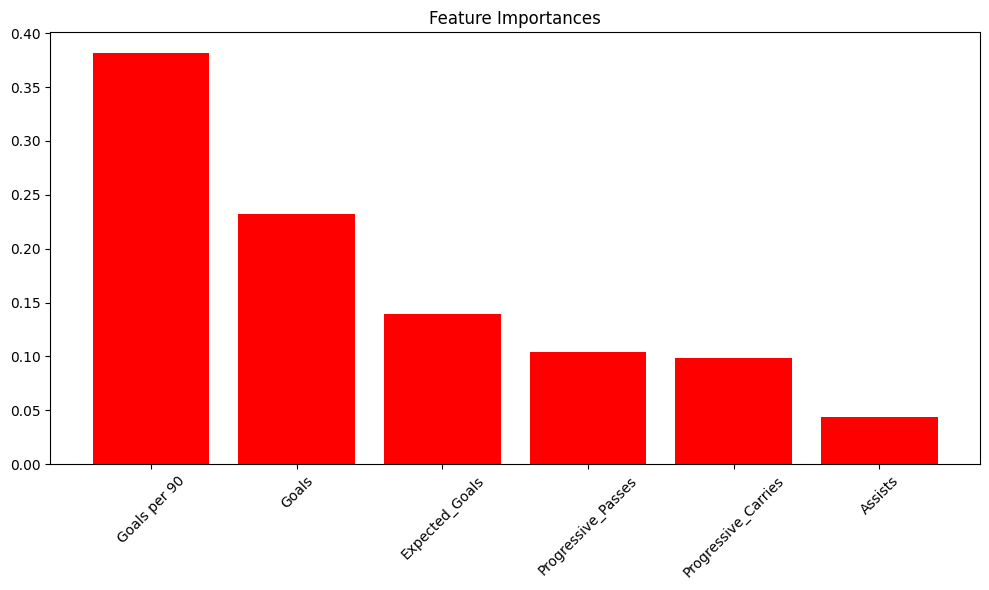

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), [X.columns[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters: ", grid_search.best_params_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.84


In [36]:
# Use the best RFC model from GridSearchCV
best_rfc = grid_search.best_estimator_

# Predict on the test set
y_pred_rfc = best_rfc.predict(X_test)

# Evaluate the model
print("RFC Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_rfc))
print("Classification Report:\n", classification_report(y_test, y_pred_rfc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))


RFC Metrics:
Accuracy: 0.8456659619450317
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       342
           1       0.70      0.79      0.74       131

    accuracy                           0.85       473
   macro avg       0.80      0.83      0.81       473
weighted avg       0.85      0.85      0.85       473

Confusion Matrix:
 [[297  45]
 [ 28 103]]


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

# Define and fit the model
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# Predict and evaluate
y_pred_gbc = gbc.predict(X_test)
print("Gradient Boosting Classifier Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbc))
print("Classification Report:\n", classification_report(y_test, y_pred_gbc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gbc))


Gradient Boosting Classifier Metrics:
Accuracy: 0.8308668076109936
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       342
           1       0.68      0.75      0.71       131

    accuracy                           0.83       473
   macro avg       0.79      0.81      0.80       473
weighted avg       0.84      0.83      0.83       473

Confusion Matrix:
 [[295  47]
 [ 33  98]]


In [38]:
from sklearn.svm import SVC

# Define and fit the model
svc = SVC(probability=True, kernel='linear', random_state=42)  # Use linear kernel for simplicity
svc.fit(X_train, y_train)

# Predict and evaluate
y_pred_svc = svc.predict(X_test)
print("Support Vector Machine Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))


Support Vector Machine Metrics:
Accuracy: 0.8477801268498943
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       342
           1       0.74      0.69      0.72       131

    accuracy                           0.85       473
   macro avg       0.81      0.80      0.81       473
weighted avg       0.85      0.85      0.85       473

Confusion Matrix:
 [[310  32]
 [ 40  91]]


In [39]:
from sklearn.neighbors import KNeighborsClassifier

# Define and fit the model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust 'n_neighbors' as needed
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test)
print("K-Nearest Neighbors Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Metrics:
Accuracy: 0.8118393234672304
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       342
           1       0.69      0.58      0.63       131

    accuracy                           0.81       473
   macro avg       0.77      0.74      0.75       473
weighted avg       0.80      0.81      0.81       473

Confusion Matrix:
 [[308  34]
 [ 55  76]]


In [40]:
import pandas as pd

results = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN'],
    'Accuracy': [accuracy_score(y_test, y_pred_rfc),
                 accuracy_score(y_test, y_pred_gbc),
                 accuracy_score(y_test, y_pred_svc),
                 accuracy_score(y_test, y_pred_knn)]
})

print(results)


               Model  Accuracy
0      Random Forest  0.845666
1  Gradient Boosting  0.830867
2                SVM  0.847780
3                KNN  0.811839


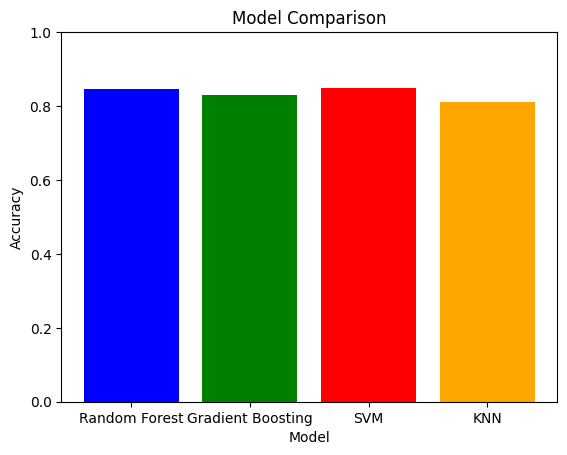

In [41]:
import matplotlib.pyplot as plt

plt.bar(results['Model'], results['Accuracy'], color=['blue', 'green', 'red', 'orange'])
plt.title("Model Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


In [42]:
def predict_team_win_rate(team_features, model, feature_columns):
    """
    Predict the win probability of a team based on its features.

    Parameters:
    - team_features: dict, a dictionary of input features for the team
    - model: Trained model to use for predictions
    - feature_columns: List of feature columns used during training

    Returns:
    - win_probability: float, predicted win probability
    """
    # Ensure the input features match the order of the feature_columns
    input_data = pd.DataFrame([team_features], columns=feature_columns)

    # Predict win probability
    win_probability = model.predict_proba(input_data)[:, 1][0]  # Probability of the 'win' class (1)

    return win_probability


In [43]:
# Define the input features for a team (replace with real values)
team_features = {
    'Team_Avg_Goals': 1.8,
    'Team_Avg_Assists': 1.5,
    'Team_Defensive_Score': 85,
    'Opponent_Avg_Goals': 1.2,
    'Opponent_Defensive_Score': 78,
    # Add all other required features here
}

# Feature columns (ensure this matches the training set columns)
feature_columns = ['Team_Avg_Goals', 'Team_Avg_Assists', 'Team_Defensive_Score',
                   'Opponent_Avg_Goals', 'Opponent_Defensive_Score']

# Predict win probability
win_probability = predict_team_win_rate(team_features, best_rfc, feature_columns)
print(f"Predicted Win Probability: {win_probability * 100:.2f}%")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Opponent_Avg_Goals
- Opponent_Defensive_Score
- Team_Avg_Assists
- Team_Avg_Goals
- Team_Defensive_Score
Feature names seen at fit time, yet now missing:
- Assists
- Expected_Goals
- Goals
- Goals per 90
- Progressive_Carries
- ...


In [44]:
def predict_team_win_rate(team_features, model, feature_columns):
    """
    Predict the win probability of a team based on its features.

    Parameters:
    - team_features: dict, input features for the team, matching the training feature names.
    - model: Trained model to use for predictions.
    - feature_columns: List of feature columns used during training.

    Returns:
    - win_probability: float, predicted win probability.
    """
    # Ensure the input features match the order of the feature_columns
    input_data = pd.DataFrame([team_features], columns=feature_columns)

    # Predict win probability
    win_probability = model.predict_proba(input_data)[:, 1][0]  # Probability of the 'win' class (1)

    return win_probability

# Example usage
team_features = {
    'Goals': 65,  # Example goal count
    'Assists': 45,  # Example assist count
    'Expected_Goals': 62.5,  # Example xG
    'Progressive_Passes': 1200,  # Example progressive passes
    'Progressive_Carries': 850,  # Example progressive carries
    'Goals per 90': 1.8  # Example goals per 90 minutes
}

# Feature columns must match the training columns
feature_columns = ['Goals', 'Assists', 'Expected_Goals',
                   'Progressive_Passes', 'Progressive_Carries', 'Goals per 90']

# Predict win probability
win_probability = predict_team_win_rate(team_features, best_rfc, feature_columns)
print(f"Predicted Win Probability: {win_probability * 100:.2f}%")


Predicted Win Probability: 84.47%


In [45]:
df.columns

Index(['Season', 'Index', 'Rank', 'Player_Name', 'Nationality', 'Position',
       'Team', 'Player_Age', 'Year_Born', 'Matches_Played', 'Starts',
       'Minutes_Played', 'Matches_90s', 'Goals', 'Assists', 'Goals_Assists',
       'Goals_No_Penalty', 'Penalties_Scored', 'Penalties_Attempted',
       'Yellow_Cards', 'Red_Cards', 'Expected_Goals',
       'Non_Penalty_Expected_Goals', 'Expected_Assists',
       'Non_Penalty_Expected_Goals_Assists', 'Progressive_Carries',
       'Progressive_Passes', 'Progressive_Passes_Received', 'Goals.1',
       'Assists.1', 'Goals_Assists.1', 'Goals_No_Penalty.1', 'G+A-PK',
       'Expected_Goals.1', 'Expected_Assists.1', 'xG+xAG',
       'Non_Penalty_Expected_Goals.1', 'Non_Penalty_Expected_Goals_Assists.1',
       'Match_Instances'],
      dtype='object')

In [46]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("Player_stats.csv")

def calculate_team_stats(team_name, dataset, feature_columns):
    """
    Calculate aggregated stats for a team based on player stats.

    Parameters:
    - team_name: str, name of the team.
    - dataset: DataFrame, dataset containing player stats.
    - feature_columns: List of columns to aggregate for team stats.

    Returns:
    - team_stats: dict, aggregated team stats for the given team.
    """
    team_data = dataset[dataset['Team'] == team_name]
    if team_data.empty:
        raise ValueError(f"Team {team_name} not found in the dataset.")

    # Aggregate features for the team
    team_stats = team_data[feature_columns].mean().to_dict()
    return team_stats

def predict_match_win_probability(team1, team2, dataset, model, feature_columns):
    """
    Predict win probabilities for two teams facing each other.

    Parameters:
    - team1: str, name of the first team.
    - team2: str, name of the second team.
    - dataset: DataFrame, dataset containing player stats.
    - model: Trained model to use for prediction.
    - feature_columns: List of feature columns used during training.

    Returns:
    - result: dict, win probabilities for both teams.
    """
    # Get aggregated stats for both teams
    team1_stats = calculate_team_stats(team1, dataset, feature_columns)
    team2_stats = calculate_team_stats(team2, dataset, feature_columns)

    # Prepare input features for prediction
    team1_features = np.array(list(team1_stats.values())).reshape(1, -1)
    team2_features = np.array(list(team2_stats.values())).reshape(1, -1)

    # Predict win probabilities
    team1_win_prob = model.predict_proba(team1_features)[0][1]  # Probability of win
    team2_win_prob = model.predict_proba(team2_features)[0][1]  # Probability of win

    # Normalize probabilities
    total_prob = team1_win_prob + team2_win_prob
    team1_win_prob /= total_prob
    team2_win_prob /= total_prob

    return {
        team1: f"{team1_win_prob * 100:.2f}%",
        team2: f"{team2_win_prob * 100:.2f}%"
    }

# Example usage
# Feature columns to use for prediction (based on your dataset)
feature_columns = [
    'Goals', 'Assists', 'Expected_Goals', 'Progressive_Passes',
    'Progressive_Carries', 'Goals_No_Penalty'
]

# Predict win probabilities
team1 = "Athletic Club"
team2 = "Barcelona"

match_result = predict_match_win_probability(team1, team2, df, best_rfc, feature_columns)
print(match_result)


{'Athletic Club': '51.40%', 'Barcelona': '48.60%'}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


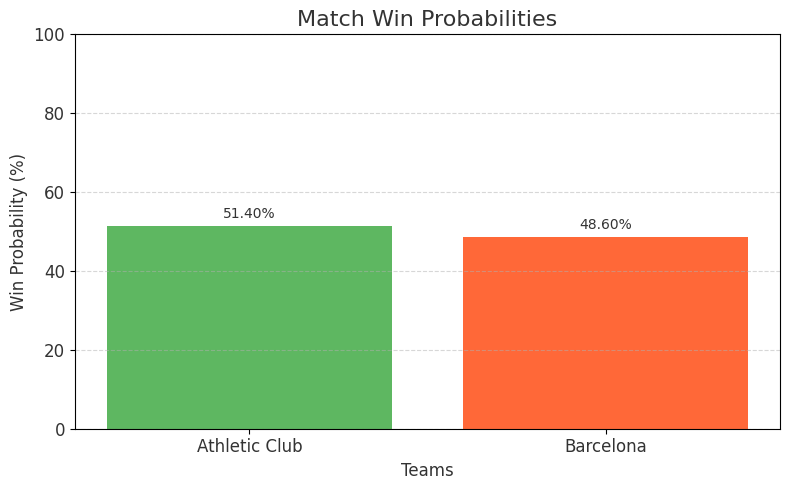

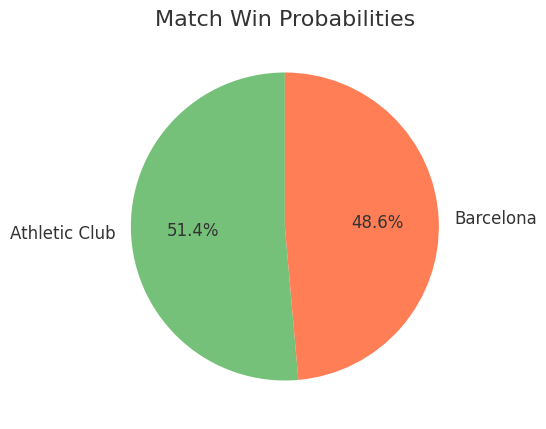

In [48]:
import matplotlib.pyplot as plt

# Example match result
match_result = {
    "Athletic Club": 0.5140,  # 32.45%
    "Barcelona": 0.4860       # 67.55%
}

# Extract data
teams = list(match_result.keys())
probabilities = list(match_result.values())

# Define custom colors
bar_colors = ['#4CAF50', '#FF5722']  # Green and Orange
pie_colors = ['#66BB6A', '#FF7043']  # Light Green and Light Orange

# Bar Chart Visualization
plt.figure(figsize=(8, 5))
plt.bar(teams, [p * 100 for p in probabilities], color=bar_colors, alpha=0.9)
plt.title("Match Win Probabilities", fontsize=16, color="#333")
plt.ylabel("Win Probability (%)", fontsize=12, color="#333")
plt.xlabel("Teams", fontsize=12, color="#333")
plt.ylim(0, 100)
plt.xticks(fontsize=12, color="#333")
plt.yticks(fontsize=12, color="#333")
for i, prob in enumerate(probabilities):
    plt.text(i, prob * 100 + 2, f"{prob * 100:.2f}%", ha='center', fontsize=10, color="#333")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("team-win-probabilities-bar.png")
plt.show()

# Pie Chart Visualization
plt.figure(figsize=(8, 5))
plt.pie(
    probabilities,
    labels=teams,
    autopct="%1.1f%%",
    colors=pie_colors,
    startangle=90,
    textprops={'fontsize': 12, 'color': "#333"},
    wedgeprops={'alpha': 0.9}
)
plt.title("Match Win Probabilities", fontsize=16, color="#333")
plt.savefig("team-win-probabilities-pie.png")
plt.show()

# **Player Categorization**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = "Player_stats.csv"
data = pd.read_csv(file_path)

# Automatically classify players into categories based on performance metrics
def classify_player(row):
    """
    Classify players into more refined categories based on their performance metrics.
    """
    if row["Goals"] >= 15 and row["Expected_Goals"] >= 12:
        return "Elite Goalscorer"
    elif row["Goals"] >= 8 and row["Expected_Goals"] >= 6:
        return "Goalscorer"
    elif row["Assists"] >= 12 or (row["Progressive_Passes"] >= 30 and row["Expected_Assists"] >= 8):
        return "Elite Playmaker"
    elif row["Assists"] >= 8 or row["Progressive_Passes"] >= 20:
        return "Playmaker"
    elif row["Progressive_Carries"] >= 20 and row["Yellow_Cards"] <= 3:
        return "Ball Carrier"
    elif row["Yellow_Cards"] >= 8 or row["Red_Cards"] >= 1:
        return "Aggressive Defender"
    elif row["Progressive_Carries"] >= 10 and row["Progressive_Passes"] >= 10:
        return "All-rounder"
    elif row["Minutes_Played"] >= 2500 and row["Goals"] + row["Assists"] < 5:
        return "Workhorse"
    else:
        return "Others"


# Apply classification to create the 'Category' column
data["Category"] = data.apply(classify_player, axis=1)

# Define features and target
features = [
    "Goals", "Assists", "Progressive_Carries", "Progressive_Passes",
    "Expected_Goals", "Expected_Assists", "Minutes_Played", "Matches_Played"
]

# Ensure no missing values
data = data.dropna(subset=features)

# Encode target labels
label_encoder = LabelEncoder()
data["Category_Encoded"] = label_encoder.fit_transform(data["Category"])

# Split data into features (X) and target (y)
X = data[features]
y = data["Category_Encoded"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define algorithms to compare
models = {
    "Logistic Regression": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, solver='saga', random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVC(random_state=42))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('model', KNeighborsClassifier())
    ])
}

# Compare models using cross-validation (F1 score)
results = []
scorer = make_scorer(f1_score, average="weighted")

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring=scorer)  # No data split, checks all players
    results.append((model_name, scores.mean()))

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=["Model", "F1 Score"]).sort_values(by="F1 Score", ascending=False)

# Display model comparison
print("Model Comparison:")
print(results_df)

Model Comparison:
                    Model  F1 Score
2       Gradient Boosting  0.953842
1           Random Forest  0.949745
0     Logistic Regression  0.888629
4     K-Nearest Neighbors  0.883212
3  Support Vector Machine  0.882767


Classification Report on All Players:
                     precision    recall  f1-score   support

Aggressive Defender       1.00      0.71      0.83        69
        All-rounder       1.00      1.00      1.00        52
       Ball Carrier       1.00      1.00      1.00        34
   Elite Goalscorer       1.00      1.00      1.00        23
    Elite Playmaker       1.00      1.00      1.00         5
         Goalscorer       1.00      1.00      1.00        82
             Others       0.98      1.00      0.99       784
          Playmaker       1.00      1.00      1.00      1298
          Workhorse       1.00      1.00      1.00        56

           accuracy                           0.99      2403
          macro avg       1.00      0.97      0.98      2403
       weighted avg       0.99      0.99      0.99      2403



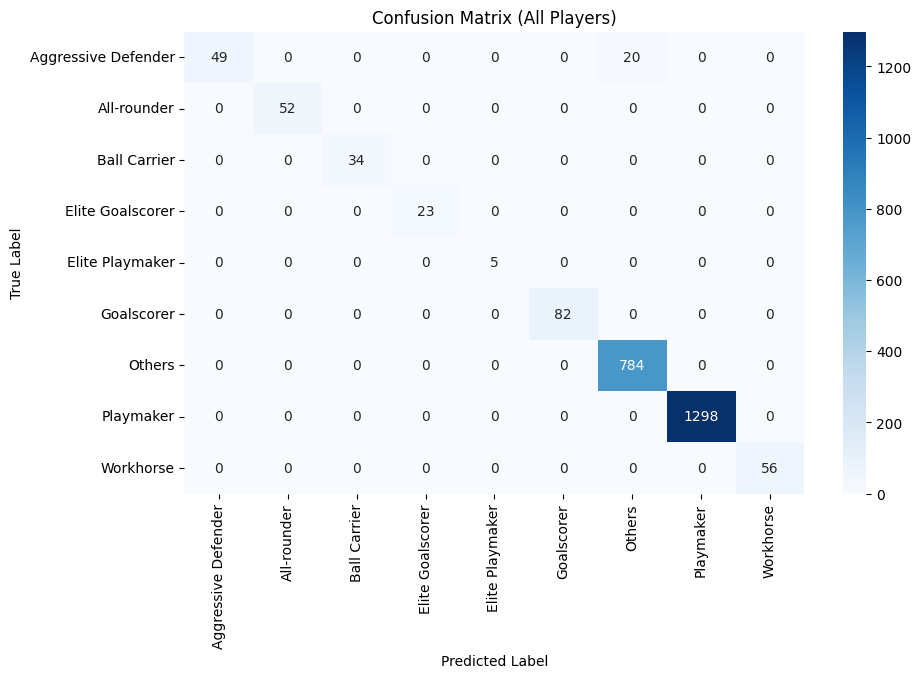


Sample of Categorized Players:
                  Player_Name           Team  Goals  Assists  \
0               Sabit Abdulai         Getafe      0        0   
1                Marcos Acuña        Sevilla      1        2   
2              Bobby Adekanye          Cádiz      0        0   
3        Martin Agirregabiria         Alavés      0        1   
4                Joseph Aidoo     Celta Vigo      0        0   
5                Carlos Akapo          Cádiz      1        0   
6               Paul Akouokou          Betis      0        0   
7                  Jony Álamo          Elche      0        0   
8                  Jordi Alba      Barcelona      3        5   
9                 Raúl Albiol     Villarreal      0        0   
10               Paco Alcácer     Villarreal      6        4   
11               Pedro Alcalá          Cádiz      0        0   
12              Rubén Alcaraz     Valladolid      1        0   
13                 Iván Alejo          Cádiz      1        1   
14      

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the selected model (Gradient Boosting)
best_model = GradientBoostingClassifier(random_state=42)
best_model.fit(X, y)  # Train on the entire dataset to classify all players

# Predict on the same dataset to check all players
data["Predicted_Category"] = label_encoder.inverse_transform(best_model.predict(X))

# Classification Report on the same dataset
y_pred = best_model.predict(X)
print("Classification Report on All Players:")
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (All Players)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display a sample of categorized players
print("\nSample of Categorized Players:")
print(data[["Player_Name", "Team", "Goals", "Assists", "Predicted_Category"]].head(20))

# Save the categorized data to a CSV file (optional)
# data.to_csv("ml_categorized_la_liga_players_gradient_boosting.csv", index=False)

Classification Report on All Players:
                     precision    recall  f1-score   support

Aggressive Defender       1.00      0.96      0.98        69
        All-rounder       1.00      1.00      1.00        52
       Ball Carrier       1.00      1.00      1.00        34
   Elite Goalscorer       1.00      1.00      1.00        23
    Elite Playmaker       1.00      1.00      1.00         5
         Goalscorer       1.00      1.00      1.00        82
             Others       1.00      1.00      1.00       784
          Playmaker       1.00      1.00      1.00      1298
          Workhorse       1.00      1.00      1.00        56

           accuracy                           1.00      2403
          macro avg       1.00      1.00      1.00      2403
       weighted avg       1.00      1.00      1.00      2403



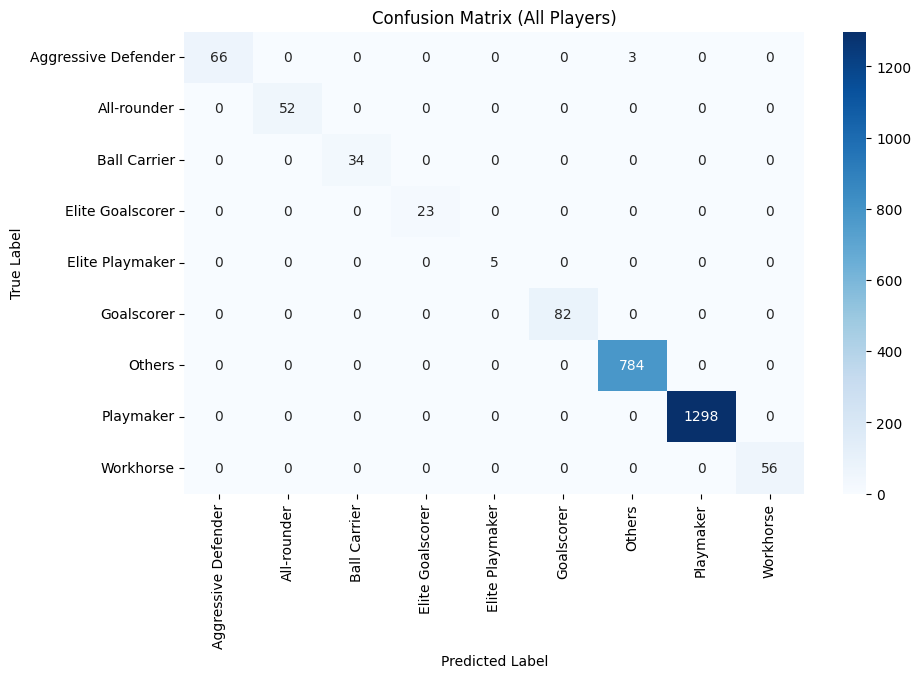


Sample of Categorized Players:
                  Player_Name           Team  Goals  Assists  \
0               Sabit Abdulai         Getafe      0        0   
1                Marcos Acuña        Sevilla      1        2   
2              Bobby Adekanye          Cádiz      0        0   
3        Martin Agirregabiria         Alavés      0        1   
4                Joseph Aidoo     Celta Vigo      0        0   
5                Carlos Akapo          Cádiz      1        0   
6               Paul Akouokou          Betis      0        0   
7                  Jony Álamo          Elche      0        0   
8                  Jordi Alba      Barcelona      3        5   
9                 Raúl Albiol     Villarreal      0        0   
10               Paco Alcácer     Villarreal      6        4   
11               Pedro Alcalá          Cádiz      0        0   
12              Rubén Alcaraz     Valladolid      1        0   
13                 Iván Alejo          Cádiz      1        1   
14      

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train the selected model (Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)  # Train on the entire dataset to classify all players

# Predict on the same dataset to check all players
data["Predicted_Category"] = label_encoder.inverse_transform(best_model.predict(X))

# Classification Report on the same dataset
y_pred = best_model.predict(X)
print("Classification Report on All Players:")
print(classification_report(y, y_pred, target_names=label_encoder.classes_))

# Plot confusion matrix
conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix (All Players)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Display a sample of categorized players
print("\nSample of Categorized Players:")
print(data[["Player_Name", "Team", "Goals", "Assists", "Predicted_Category"]].head(20))

# Save the categorized data to a CSV file (optional)
# data.to_csv("ml_categorized_la_liga_players.csv", index=False)

# Prediction vs Actual league table for 23-24

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Load dataset
file_path = "cleaned_dataset_no_index.csv"  # Update with your actual path
data = pd.read_csv(file_path)

In [ ]:
# Step 1: Split data into training (2020-2023) and testing (2023-2024) based on the 'Season' column
train_data = data[data['Season'].isin(['2020-2021', '2021-2022', '2022-2023'])]
test_data = data[data['Season'] == '2023-2024']


In [ ]:
# Step 2: Define features and target column
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
target = 'League_Position'  # Assuming league positions are to be calculated based on rank


In [ ]:
# Calculate league position for training and testing data using consistent ranking
train_data[target] = train_data.groupby('Season')['Goals (Gls)'].rank(ascending=False, method='dense').astype(int)
test_data[target] = test_data.groupby('Season')['Goals (Gls)'].rank(ascending=False, method='dense').astype(int)


<ipython-input-36-e9638ba8ffc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[target] = train_data.groupby('Season')['Goals (Gls)'].rank(ascending=False, method='dense').astype(int)
<ipython-input-36-e9638ba8ffc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target] = test_data.groupby('Season')['Goals (Gls)'].rank(ascending=False, method='dense').astype(int)


In [ ]:
# Step 3: Prepare features (X) and target (y)
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]


In [ ]:
# Step 4: Align labels between train and test
all_labels = pd.concat([y_train, y_test]).unique()  # Combine unique labels
label_encoder = LabelEncoder()
label_encoder.fit(all_labels)  # Fit on all possible labels


LabelEncoder()

In [ ]:
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Step 5: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train_encoded)


RandomForestClassifier(random_state=42)

In [ ]:
# Step 6: Make predictions on the test set
y_pred_encoded = model.predict(X_test)
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [ ]:
# Step 7: Add predictions to the test dataset and compare with actual positions
test_data['Predicted Position'] = y_pred
test_data = test_data.sort_values(by='Predicted Position').reset_index(drop=True)
test_data['Unique Predicted Position'] = range(1, len(test_data) + 1)


<ipython-input-42-60253eff537c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted Position'] = y_pred


In [ ]:
# Step 8: Evaluate the model
print("Classification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2
           3       0.20      1.00      0.33         1
           4       0.00      0.00      0.00         1
           5       0.33      0.33      0.33         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00        11
          15       0.00      0.00      0.00        13
          16       0.00      0.00      0.00        12
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 9: Display top 20 teams by predicted positions
top_20_teams = test_data.head(20)
print(top_20_teams[['Team', 'Unique Predicted Position', 'League_Position', 'Predicted Position']])


          Team  Unique Predicted Position  League_Position  Predicted Position
0    Barcelona                          1                3                   2
1       Girona                          2                1                   2
2   Villarreal                          3                2                   2
3           AM                          4                5                   4
4      Osasuna                          5                4                   4
5           AM                          6                6                   4
6   RealMadrid                          7                3                   4
7   RealMadrid                          8                6                   4
8           AC                          9                7                   5
9       Getafe                         10                6                   6
10          CV                         11                8                   6
11    Valencia                         12           

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
file_path = 'cleaned_dataset_no_index-1.csv'  # Update with your dataset file path
data = pd.read_csv(file_path,encoding="utf-8")

# Select relevant columns for recommendation
columns_to_use = [
    'Player', 'Team', 'Goals (Gls)', 'Assists (Ast)',
    'Progressive Carries (PrgC)', 'Progressive Passes (PrgP)', 'Minutes Played (Min)'
]

# Check if required columns exist
if all(col in data.columns for col in columns_to_use):
    # Filter dataset with relevant columns
    relevant_data = data[columns_to_use].dropna()

    # Create a performance score based on goals, assists, and other metrics
    relevant_data['Performance_Score'] = (
        relevant_data['Goals (Gls)'] * 3 +
        relevant_data['Assists (Ast)'] * 2 +
        relevant_data['Progressive Carries (PrgC)'] * 0.5 +
        relevant_data['Progressive Passes (PrgP)'] * 0.5
    )

    # Create a pivot table: Teams as rows, Players as columns, and scores as values
    pivot_table = relevant_data.pivot_table(
        index='Team', columns='Player', values='Performance_Score', fill_value=0
    )

    # Compute cosine similarity between teams
    team_similarity = cosine_similarity(pivot_table)
    team_similarity_df = pd.DataFrame(team_similarity, index=pivot_table.index, columns=pivot_table.index)

    # Function to recommend players for all teams
    def recommend_for_all_teams(num_recommendations=5):
        """
        Recommends players for all teams based on similarity.
        Args:
            num_recommendations (int): Number of recommendations per team.
        Returns:
            dict: Recommendations for each team.
        """
        all_teams = pivot_table.index
        recommendations = {}

        for team in all_teams:
            team_players = pivot_table.loc[team][pivot_table.loc[team] > 0].index
            team_recommendations = {}

            similar_teams = team_similarity_df[team].sort_values(ascending=False).index[1:]

            for similar_team in similar_teams:
                similar_team_players = pivot_table.loc[similar_team][pivot_table.loc[similar_team] > 0].index

                for player in similar_team_players:
                    if player not in team_players:
                        team_recommendations[player] = pivot_table.loc[similar_team, player]

            # Sort recommendations by score and take the top N
            sorted_recommendations = sorted(team_recommendations.items(), key=lambda x: x[1], reverse=True)
            recommendations[team] = sorted_recommendations[:num_recommendations]

        return recommendations

    # Get recommendations for every team
    all_team_recommendations = recommend_for_all_teams()

    # Format and display recommendations
    for team, recs in all_team_recommendations.items():
        print(f"\nTop recommendations for {team}:")
        for player, score in recs:
            print(f"  {player}: Predicted Performance Score {score:.2f}")
else:
    print("Required columns are missing from the dataset.")


Top recommendations for AC:
  Lionel Messi: Predicted Performance Score 383.00
  Karim Benzema: Predicted Performance Score 201.00
  Sergi Darder: Predicted Performance Score 190.25
  Vinicius Júnior: Predicted Performance Score 184.17
  Toni Kroos: Predicted Performance Score 183.83

Top recommendations for AM:
  Lionel Messi: Predicted Performance Score 383.00
  Karim Benzema: Predicted Performance Score 201.00
  Sergi Darder: Predicted Performance Score 190.25
  Vinicius Júnior: Predicted Performance Score 184.17
  Toni Kroos: Predicted Performance Score 183.83

Top recommendations for Ac:
  Lionel Messi: Predicted Performance Score 383.00
  Karim Benzema: Predicted Performance Score 201.00
  Sergi Darder: Predicted Performance Score 190.25
  Vinicius Júnior: Predicted Performance Score 184.17
  Toni Kroos: Predicted Performance Score 183.83

Top recommendations for Alaves:
  Lionel Messi: Predicted Performance Score 383.00
  Karim Benzema: Predicted Performance Score 201.00
  Serg

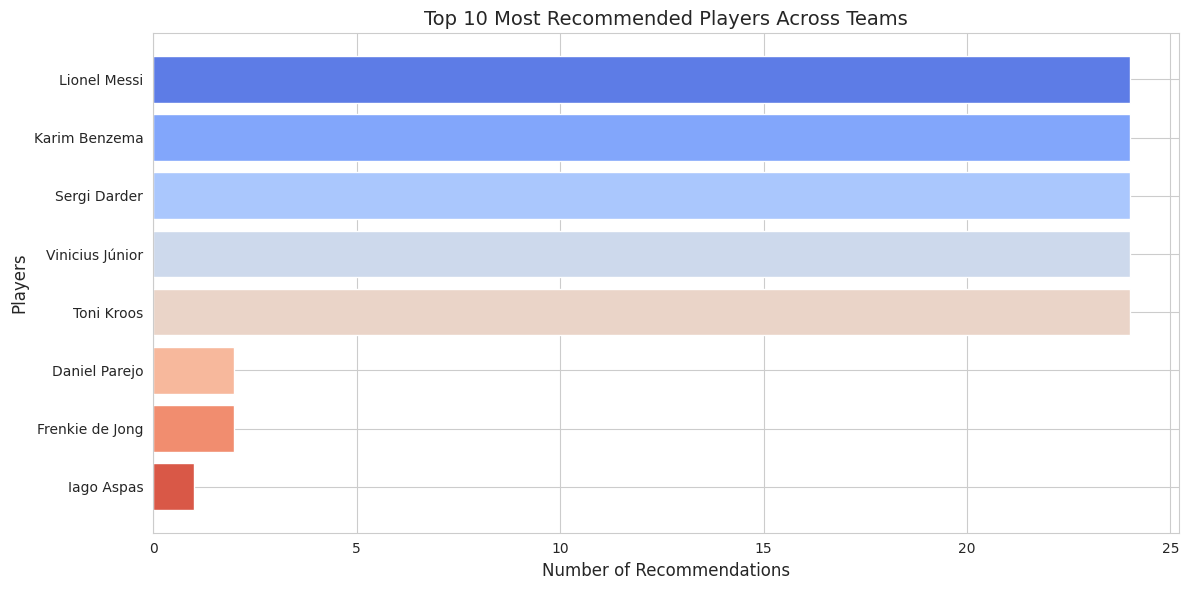

In [ ]:
# Replot with aesthetic colors
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Collect all recommended players across teams
all_recommended_players = []

for team, recs in all_team_recommendations.items():
    all_recommended_players.extend([player for player, _ in recs])

# Count the frequency of each recommended player
player_recommendation_counts = Counter(all_recommended_players)

# Get the top 10 most recommended players
top_players = player_recommendation_counts.most_common(10)

# Separate names and counts for visualization
players, counts = zip(*top_players)

# Set aesthetic style
sns.set_style("whitegrid")
sns.set_palette("coolwarm")

# Plot the data with aesthetic colors
plt.figure(figsize=(12, 6))
plt.barh(players, counts, color=sns.color_palette("coolwarm", len(players)))
plt.xlabel('Number of Recommendations', fontsize=12)
plt.ylabel('Players', fontsize=12)
plt.title('Top 10 Most Recommended Players Across Teams', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Aggregate team stats
team_stats = data.groupby('Team').agg({
    'Goals (Gls)': 'sum',
    'Assists (Ast)': 'sum',
    'Yellow Cards (CrdY)': 'sum',
    'Red Cards (CrdR)': 'sum',
    'Expected Goals (xG)': 'sum'
}).reset_index()

# Define target (Top half: 1, Bottom half: 0)
team_stats['Top_Half'] = team_stats['Goals (Gls)'].rank(ascending=False).apply(lambda x: 1 if x <= len(team_stats) / 2 else 0)

# Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
X = team_stats[features]
y = team_stats['Top_Half']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Step 1: Define the target as league position (e.g., 1st, 2nd, ...)
team_stats['League_Position'] = team_stats['Goals (Gls)'].rank(ascending=False).astype(int)

# Step 2: Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
target = 'League_Position'

X = team_stats[features]
y = team_stats[target]

# Encode the league position for multi-class classification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = model.predict(X_test)

# Get unique classes in the test set
unique_classes_in_test = np.unique(y_test)

# Generate a classification report with the correct labels
print("Classification Report:")
print(classification_report(
    y_test,
    y_pred,
    labels=unique_classes_in_test,
    target_names=list(map(str, label_encoder.inverse_transform(unique_classes_in_test)))
))

# Function to predict specific position for a team
def predict_team_position(team_name, model, team_stats, features, label_encoder):
    """
    Predicts the league position of a team using the trained model.

    Args:
        team_name (str): The name of the team to predict.
        model: Trained Random Forest Classifier.
        team_stats (pd.DataFrame): Aggregated team stats dataframe.
        features (list): List of features used in the model.
        label_encoder: LabelEncoder instance used to encode positions.

    Returns:
        str: Prediction result for the specified team.
    """
    # Filter the stats for the specific team
    team_data = team_stats[team_stats['Team'] == team_name]

    if team_data.empty:
        return f"Team '{team_name}' not found in the dataset."

    # Extract feature values
    X_team = team_data[features]

    # Predict using the model
    prediction_encoded = model.predict(X_team)
    prediction_decoded = label_encoder.inverse_transform(prediction_encoded)

    return f"Predicted League Position for {team_name}: {prediction_decoded[0]}"

# Example usage
team_name = "RealMadrid"  # Replace with the team name you want to predict
result = predict_team_position(team_name, model, team_stats, features, label_encoder)
print(result)

Classification Report:
              precision    recall  f1-score   support

          14       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          25       0.00      0.00      0.00       1.0

   micro avg       0.00      0.00      0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Predicted League Position for RealMadrid: 1


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Step 1: Define the target as league position (e.g., 1st, 2nd, ...)
team_stats['League_Position'] = team_stats['Goals (Gls)'].rank(ascending=False).astype(int)

# Step 2: Features and target
features = ['Goals (Gls)', 'Assists (Ast)', 'Yellow Cards (CrdY)', 'Red Cards (CrdR)', 'Expected Goals (xG)']
target = 'League_Position'

X = team_stats[features]
y = team_stats[target]

# Encode the league position for multi-class calassification
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 4: Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 5: Predict positions for all teams
predicted_positions_encoded = model.predict(X)
predicted_positions = label_encoder.inverse_transform(predicted_positions_encoded)
# Step 6: Add predictions to the dataframe
team_stats['Predicted Position'] = predicted_positions

# Step 7: Sort teams by predicted positions and reassign unique positions
team_stats_sorted = team_stats.sort_values(by='Predicted Position').reset_index(drop=True)
team_stats_sorted['Unique Predicted Position'] = range(1, len(team_stats_sorted) + 1)

# Step 8: Display the top 20 teams
top_20_teams = team_stats_sorted.head(20)
print(top_20_teams[['Team', 'Unique Predicted Position']])


# Optional: Save the table to a CSV file
top_20_teams[['Team', 'Predicted Position']].to_csv('top_20_teams_predictions.csv', index=False)

            Team  Unique Predicted Position
0      Barcelona                          1
1     RealMadrid                          2
2             AM                          3
3     Villarreal                          4
4             RB                          5
5        Almeria                          6
6   RealSociadad                          7
7             CV                          8
8       Valencia                          9
9        Osasuna                         10
10         Elche                         11
11        Getafe                         12
12         Cadiz                         13
13       Levante                         14
14            AC                         15
15       Granada                         16
16      Mallorca                         17
17      Espanyol                         18
18            RV                         19
19    Valladolid                         20


# Player Cluster analysis

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Load player data
data = pd.read_csv('cleaned_dataset_no_index.csv')

In [ ]:
# Select relevant columns for clustering
performance_columns = [
    'Goals (Gls)', 'Assists (Ast)', 'Expected Goals (xG)',
    'Non-Penalty xG (npxG)', 'Expected Assisted Goals (xAG)',
    'Progressive Carries (PrgC)', 'Progressive Passes (PrgP)',
    'Goals per 90 Minutes (Gls/90)', 'Assists per 90 Minutes (Ast/90)'
]


In [ ]:
# Filter the dataset for relevant columns
player_data = data[performance_columns].dropna()

In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(player_data)


In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Set the number of clusters (can be adjusted)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# Add cluster labels to the original dataframe
data['Cluster'] = clusters

In [ ]:
# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

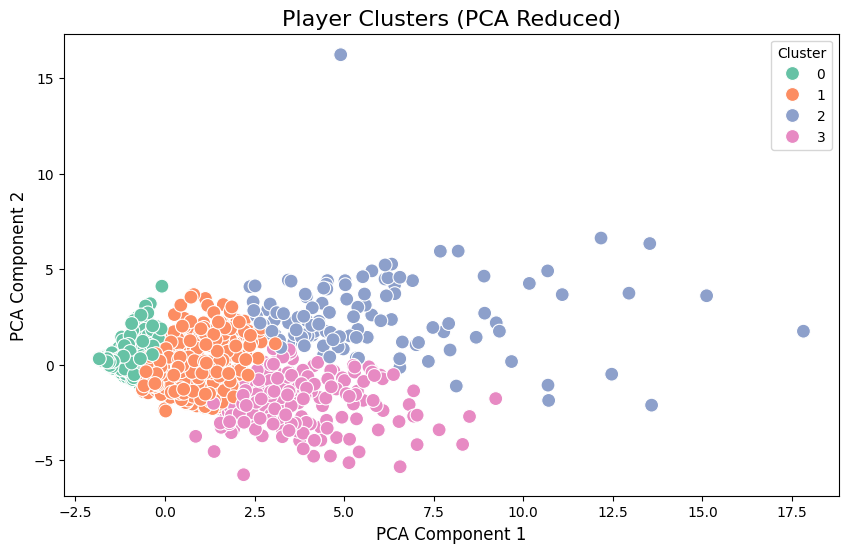

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=pca_result[:, 0],
    y=pca_result[:, 1],
    hue=data['Cluster'],
    palette='Set2',
    s=100
)
plt.title('Player Clusters (PCA Reduced)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Inspect a cluster
for cluster_id in range(4):
    print(f"\nPlayers in Cluster {cluster_id}:")
    print(data[data['Cluster'] == cluster_id][['Player', 'Team', 'Goals (Gls)', 'Assists (Ast)']])



Players in Cluster 0:
                Player        Team  Goals (Gls)  Assists (Ast)
0           Unai Simón          AC          0.0            0.0
7        Yeray Álvarez          AC          1.0            0.0
13    Mikel Balenziaga          AC          0.0            1.0
19         Iñigo Lekue          AC          0.0            0.0
20          Ibai Gómez          AC          0.0            1.0
...                ...         ...          ...            ...
2328     Carlos Romero  Villarreal          0.0            0.0
2329        Pepe Reina  Villarreal          0.0            0.0
2330      Denis Suárez  Villarreal          0.0            0.0
2331    Stefan Lekovic  Villarreal          0.0            0.0
2332             Pascu  Villarreal          0.0            0.0

[1225 rows x 4 columns]

Players in Cluster 1:
                 Player        Team  Goals (Gls)  Assists (Ast)
1        Iñigo Martínez          AC          1.0            0.0
4            Ander Capa          AC          

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.36848933621868585


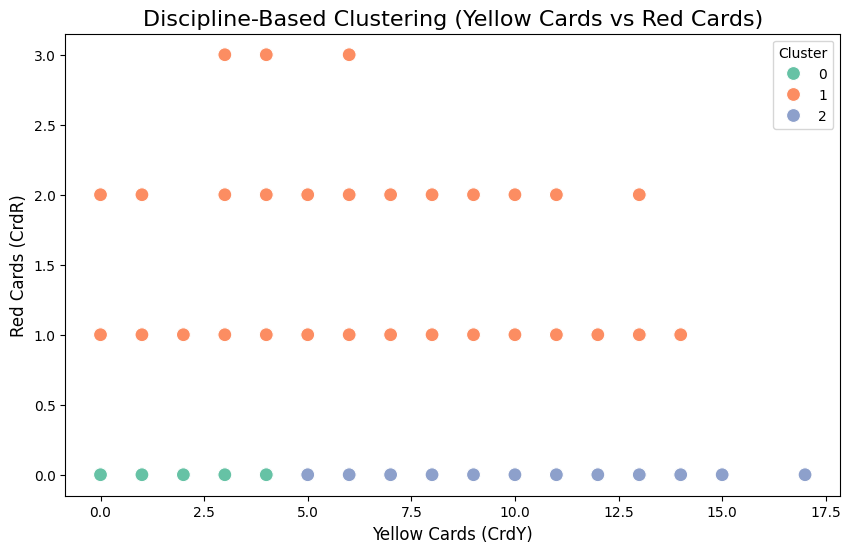

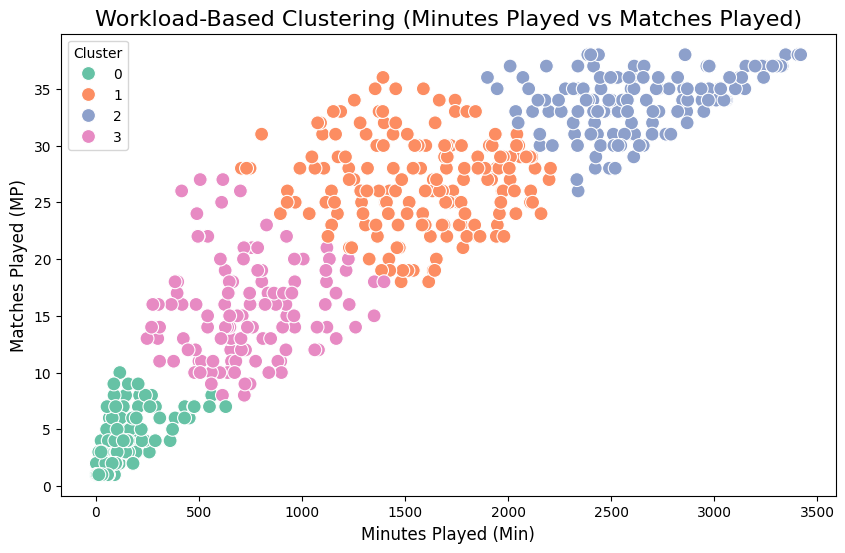

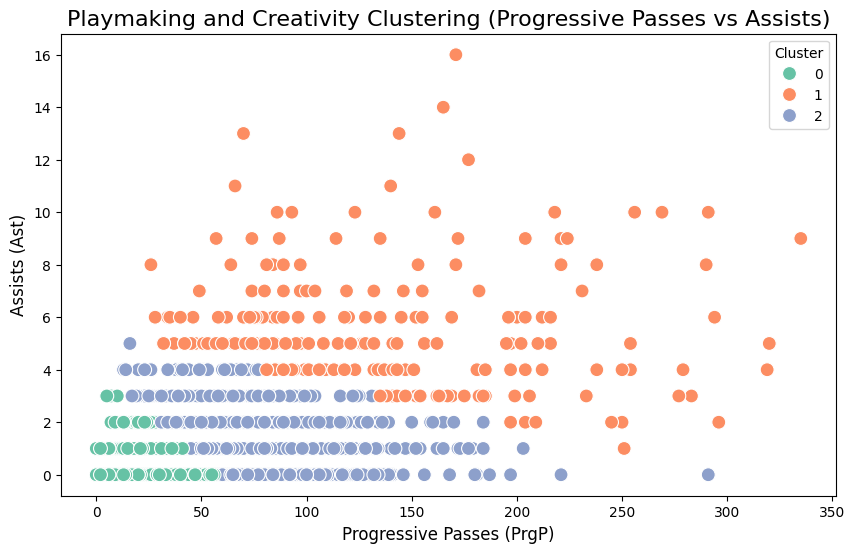

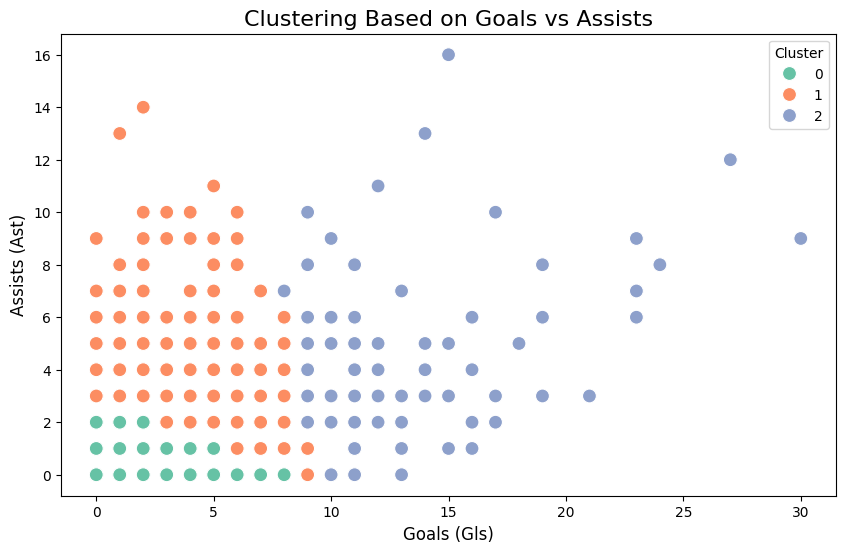

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load player data
data = pd.read_csv('cleaned_dataset_no_index.csv')

# Helper function to perform clustering and visualization
def cluster_and_visualize(data, columns, x_label, y_label, n_clusters, title):
    # Filter data for the selected columns
    subset = data[columns].dropna()

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add cluster labels to the data
    subset['Cluster'] = clusters

    # Plot the clusters based on the original features
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=subset[x_label],
        y=subset[y_label],
        hue=subset['Cluster'],
        palette='Set2',
        s=100
    )
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend(title='Cluster')
    plt.show()

    # Return the clustered data
    return subset

# 1. Discipline-Based Clustering
discipline_columns = ['Yellow Cards (CrdY)', 'Red Cards (CrdR)']
discipline_clusters = cluster_and_visualize(
    data,
    discipline_columns,
    x_label='Yellow Cards (CrdY)',
    y_label='Red Cards (CrdR)',
    n_clusters=3,
    title="Discipline-Based Clustering (Yellow Cards vs Red Cards)"
)

# 2. Workload-Based Clustering
workload_columns = ['Minutes Played (Min)', 'Matches Played (MP)']
workload_clusters = cluster_and_visualize(
    data,
    workload_columns,
    x_label='Minutes Played (Min)',
    y_label='Matches Played (MP)',
    n_clusters=4,
    title="Workload-Based Clustering (Minutes Played vs Matches Played)"
)

# 3. Playmaking and Creativity Clustering
creativity_columns = ['Progressive Passes (PrgP)', 'Assists (Ast)']
creativity_clusters = cluster_and_visualize(
    data,
    creativity_columns,
    x_label='Progressive Passes (PrgP)',
    y_label='Assists (Ast)',
    n_clusters=3,
    title="Playmaking and Creativity Clustering (Progressive Passes vs Assists)"
)

# 4. Goals vs Assists Clustering
goals_assists_columns = ['Goals (Gls)', 'Assists (Ast)']
goals_assists_clusters = cluster_and_visualize(
    data,
    goals_assists_columns,
    x_label='Goals (Gls)',
    y_label='Assists (Ast)',
    n_clusters=3,
    title="Clustering Based on Goals vs Assists"
)


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load player data
data = pd.read_csv('cleaned_dataset_no_index.csv')

# Helper function to perform interactive clustering and visualization
def interactive_cluster_and_visualize(data, columns, x_label, y_label, hover_name, n_clusters, title):
    # Filter data for the selected columns
    subset = data[columns + [hover_name]].dropna()

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(subset[columns])

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)

    # Add cluster labels to the data
    subset['Cluster'] = clusters

    # Interactive scatter plot with Plotly
    fig = px.scatter(
        subset,
        x=x_label,
        y=y_label,
        color='Cluster',
        hover_name=hover_name,
        title=title,
        color_continuous_scale=px.colors.sequential.Plasma,
        labels={'Cluster': 'Cluster Group'}
    )
    fig.update_traces(marker=dict(size=10, opacity=0.8), selector=dict(mode='markers'))
    fig.update_layout(title=dict(font=dict(size=20)), legend=dict(title='Cluster'))
    fig.show()

    # Return the clustered data
    return subset

# 1. Discipline-Based Clustering
discipline_columns = ['Yellow Cards (CrdY)', 'Red Cards (CrdR)']
discipline_clusters = interactive_cluster_and_visualize(
    data,
    discipline_columns,
    x_label='Yellow Cards (CrdY)',
    y_label='Red Cards (CrdR)',
    hover_name='Player',  # Ensure this column exists for hover text
    n_clusters=3,
    title="Discipline-Based Clustering (Yellow Cards vs Red Cards)"
)

# 2. Workload-Based Clustering
workload_columns = ['Minutes Played (Min)', 'Matches Played (MP)']
workload_clusters = interactive_cluster_and_visualize(
    data,
    workload_columns,
    x_label='Minutes Played (Min)',
    y_label='Matches Played (MP)',
    hover_name='Player',  # Ensure this column exists for hover text
    n_clusters=4,
    title="Workload-Based Clustering (Minutes Played vs Matches Played)"
)

# 3. Playmaking and Creativity Clustering
creativity_columns = ['Progressive Passes (PrgP)', 'Assists (Ast)']
creativity_clusters = interactive_cluster_and_visualize(
    data,
    creativity_columns,
    x_label='Progressive Passes (PrgP)',
    y_label='Assists (Ast)',
    hover_name='Player',  # Ensure this column exists for hover text
    n_clusters=3,
    title="Playmaking and Creativity Clustering (Progressive Passes vs Assists)"
)

# 4. Goals vs Assists Clustering
goals_assists_columns = ['Goals (Gls)', 'Assists (Ast)']
goals_assists_clusters = interactive_cluster_and_visualize(
    data,
    goals_assists_columns,
    x_label='Goals (Gls)',
    y_label='Assists (Ast)',
    hover_name='Player',  # Ensure this column exists for hover text
    n_clusters=3,
    title="Clustering Based on Goals vs Assists"
)
